In [4]:
import os
import math
import warnings
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from IPython.display import clear_output

warnings.filterwarnings("ignore")

In [84]:
def load(file_name, header=None) -> pd.DataFrame:
    """Loading dataset
    @param file_name: user input dataset
    @return: dataset
    """
    if os.path.exists(file_name) == False:
        raise ValueError("Entered File is not found")
    if os.path.isdir(file_name):
        raise ValueError("Entered string is a directory")
    if header == False:
        return pd.read_csv(file_name, header=None)
    return pd.read_csv(file_name)

def copy_df(df) -> pd.DataFrame:
    """copy df to new temp df
    @param df: user input dataset
    @return: new df
    """
    return df.copy(deep=True)

def normalize_missing_values(dataset) -> pd.DataFrame:
    """normalize dataset missing values with mean for numerical columns
    @param dataset: user input dataset
    @return: normalized dataset
    """
    for col in dataset.columns:
        # print("column: ",col, "type: ", dataset[col].dtype)
        if dataset[col].dtype == 'object':
            dataset[col] = dataset[col].fillna(method='bfill')
        else:
            dataset[col] = dataset[col].fillna(dataset[col].mean()) 
    return dataset

def print_dataset(dataset):
    """print dataset inforamtion
    @param dataset: user input dataset
    @return: print dataset information via head(), info(), shape()
    """
    print(dataset.head())
    print(dataset.info())
    print(dataset.describe())
    print(dataset.columns)
    print(dataset.iloc[:, -1].value_counts())

def dummy_variable_indicator(data, column_name) -> pd.DataFrame:
    """dummy variable indicator
    @param data: user input data
    @param column_name: column name
    @return: data with dummy variable indicator
    """
    if column_name not in data.columns:
        raise ValueError("Column not found")
    data = pd.get_dummies(data, columns=[column_name])
    return data

def remove_column(data, column_name) -> pd.DataFrame:
    """remove column
    @param data: user input data
    @param column_name: column name
    @return: data without column
    """
    if column_name not in data.columns:
        raise ValueError("Column not found")
    data = data.drop(column_name, axis=1)
    return data

def normalize_numerical_columns(data) -> pd.DataFrame:
    """normalize numerical columns to 0-1 scale
    @param data: user input data
    @return: normalized data
    """
    for col in data.columns:
        if data[col].dtype == 'int64' or data[col].dtype == 'float64':
            data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())
    return data

def concat_data(x_data, y_data) -> list:
    """
    @param x_data: feature data
    @param y_data: label data
    @return: concatenation of features and label data
    """
    return pd.concat([x_data, y_data], axis=1)

def train_test_split(data, train_size=None, test_size=None, random_state=None, shuffle=None) -> tuple:
    """split dataset into train, validation and test
    @param data: user input dataset
    @param train_size: user input train size
    @param test_size: user input test size
    @param random_state: user input random state
    @return: train, validation and test dataset
    """
    if train_size is None and test_size is None:
        raise ValueError("train_size and test_size can not be both None")
    if train_size is not None and test_size is not None and train_size + test_size > 1:
        raise ValueError("train_size and test_size sum must be equal to 1")
    if train_size is not None and test_size is not None and train_size + test_size < 1:
        raise ValueError("train_size and test_size sum is not equal to one")
    if train_size is not None:
        if train_size <= 0:
            raise ValueError("train_size must be greater than 0")
        if train_size >= 1:
            raise ValueError("train_size must be less than 1")
        if test_size is None:
            test_size = 1 - train_size
        elif test_size <= 0:
            raise ValueError("test_size must be greater than 0")
        elif test_size >= 1:
            raise ValueError("test_size must be less than 1")
    if test_size is not None:
        if test_size <= 0:
            raise ValueError("test_size must be greater than 0")
        if test_size >= 1:
            raise ValueError("test_size must be less than 1")
        if train_size is None:
            train_size = 1 - test_size
        elif train_size <= 0:
            raise ValueError("train_size must be greater than 0")
        elif train_size >= 1:
            raise ValueError("train_size must be less than 1")
    train_size = int(len(data) * train_size)
    test_size = int(len(data) * test_size)
    if shuffle is True:
        data = data.sample(frac=1).reset_index(drop=True)
    
    # print("train_size: ", train_size, "test_size: ", test_size, 'sum: ', train_size + test_size)
    train_index = np.random.choice(len(data), train_size, replace=False)
    
    # split train data
    # copy all columns from x_train except last column to x_train
    x_train = data.iloc[train_index, :-1].reset_index(drop=True)
    # x_train = data.drop(, axis=1).iloc[train_index].reset_index(drop=True)
    y_train = data.iloc[train_index, -1:].reset_index(drop=True)
    
    # differnetiate train indexes from whole data indexes
    test_index = np.setdiff1d(np.arange(len(data)), train_index)

    # split test data
    x_test = data.iloc[test_index, :-1].reset_index(drop=True)
    # x_test = data.drop('median_house_value', axis=1).iloc[test_index].reset_index(drop=True)
    y_test = data.iloc[test_index, -1:].reset_index(drop=True)
    return x_train, y_train, x_test, y_test

# def k_fold(data, k_fold_number) -> list:
#     """ K-fold data using train_test_split function
#     @param data: user input dataset
#     @param k_fold_number: number of folds
#     @return: train, validation and test dataset
#     """
#     x_train_list, x_test_list, y_train_list, y_test_list, x_validation_list, y_validation_list  = [], [], [], [], [], []
#     for _ in range(k_fold_number):
#         intermediate_data = copy_df(data)

#         # split data into train, validation and test
#         x_train, y_train, x_validation_test, y_validation_test = train_test_split(intermediate_data, train_size=.6, shuffle=True)
#         x_validation, y_validation, x_test, y_test = train_test_split(concat_data(x_validation_test, y_validation_test), test_size=.5, shuffle=True)

#         x_train_list.append(x_train)
#         x_test_list.append(x_test)
#         y_train_list.append(y_train)
#         y_test_list.append(y_test)
#         x_validation_list.append(x_validation)
#         y_validation_list.append(y_validation)
    
#     return x_train_list, y_train_list, x_test_list, y_test_list, x_validation_list, y_validation_list

# def print_k_fold_data(x_train_list, y_train_list, x_test_list, y_test_list, x_validation_list, y_validation_list):
#     """print k-fold data
#     @param x_train_list: train data
#     @param y_train_list: train label 
#     @param x_test_list: test data
#     @param y_test_list: test label 
#     @param x_validation_list: validation data
#     @param y_validation_list: validation label 
#     """
#     k_fold_number = len(x_train_list)
#     for index in range(k_fold_number):
#         print("================== K-fold {} ==================".format(index + 1))
#         print("x_train_list[", index, "]: ", x_train_list[index].shape, "y_train_list[", index, "]: ", y_train_list[index].shape)
#         print("x_validation_list[", index, "]: ", x_validation_list[index].shape, "y_validation_list[", index, "]: ", y_validation_list[index].shape)
#         print("x_test_list[", index, "]: ", x_test_list[index].shape, "y_test_list[", index, "]: ", y_test_list[index].shape)
#         print(f"sum: {x_train_list[index].shape[0] + x_validation_list[index].shape[0] + x_test_list[index].shape[0]}")


def print_hypothesis(x_train, theta):
    H_x = "H(x) = " + "{:.2f}".format(theta[0]) + " + "
    for index in range(1, x_train.shape[1]):
        if (index+1) != x_train.shape[1]:
            H_x += "{:.2f}".format(theta[index]) + f"*x_{index} + "
        else:
            H_x += "{:.2f}".format(theta[index]) + f"*x_{index}"
    print(H_x)

def hypothesis(x_train, theta):
    return np.dot(x_train, theta)

# loss with regularization
def loss_function_with_regularization(x_data, y_data, theta, regularization_parameter):
    m_number_of_samples = x_data.shape[0]
    j_theta_1_mse_loss = np.sum(np.square(hypothesis(x_data, theta) - y_data)) / 2 * m_number_of_samples
    j_theta_2_regularization_loss = (regularization_parameter / (2 * m_number_of_samples)) * np.sum(np.square(theta))
    return j_theta_1_mse_loss + j_theta_2_regularization_loss

def loss_function(x_data, y_data, theta):
    m_number_of_samples = x_data.shape[0]
    j_theta_1_mse_loss = np.sum(np.square(hypothesis(x_data, theta) - y_data)) / 2 * m_number_of_samples
    return j_theta_1_mse_loss
    

def gradient_descent(x_train, y_train, x_validation, y_validation, theta, regularization_parameter, alpha, max_iteration):
    """gradient_descent
    @param x_train: train data
    @param y_train: train label
    @param x_validation: validation data
    @param y_validation: validation label
    @param theta: wieghts
    @param regularization_paramet: lambda regularization parameter
    @param alpha: learning rate
    @param max_iteration: epochs
    @return: updated wieghts and loss function value
    """
    m_number_of_samples = x_train.shape[0]

    theta_history = []
    theta_history.append(theta)
    evaluation_with_validation_set_list = []

    with tqdm (total=max_iteration) as progress_bar:
        for iteration in range(max_iteration):
            # calculate hypothesis with respect to old_θ, to be used in updating θ
            hypothesis_value = hypothesis(x_train, theta)

            # updating θ_j with regularization
            for j_index in range(theta.shape[0]):
                if j_index != 0:
                        theta[j_index] -= alpha *  (1 / m_number_of_samples) * (np.dot(hypothesis_value - y_train, x_train[:, j_index]) + regularization_parameter * theta[j_index])
                else:
                    theta[j_index] -= alpha *  (1 / m_number_of_samples) * np.dot(hypothesis_value - y_train, x_train[:, j_index])
            
            theta_history.append(theta)
            evaluation_with_validation_set_list.append(loss_function_with_regularization(x_validation, y_validation, theta, regularization_parameter))

            progress_bar.update(1)

            if len(evaluation_with_validation_set_list) >= 5:
                treshold_list = np.array(evaluation_with_validation_set_list[-5:])
                # print(treshold_list)
                if treshold_list[-1 and -2 and -3 and -4] > treshold_list[-5]:
                    if alpha > 1e-3:
                        feedback = f"learning rate is too high, reducing it from {alpha}"
                        alpha /= 2
                        feedback += f" to {alpha} in iteration {iteration}"
                        print(feedback)
                        continue
                    print("iteration: ", iteration, "alpha: ", alpha)
                    print("treshold_list: ", treshold_list)
                    print("last theta: ", theta)
                    return theta, theta_history, evaluation_with_validation_set_list

            if len(evaluation_with_validation_set_list) >= 10:
                plateau_list = np.array(evaluation_with_validation_set_list[-10:])
                if np.all(plateau_list == plateau_list[0]):
                    print("iteration: ", iteration, "alpha: ", alpha)
                    print("plateau: ", plateau_list)
                    alpha *= 2

        print("last theta: ", theta)

    return theta, theta_history, evaluation_with_validation_set_list


# =============================== error functions ===============================
def calculate_r_squared(y_predict, y_test):
    """
    calculate r squared
    @param y_predict: predict value
    @param y_test: test value
    @return: r squared
    """
    return 1 - (np.sum(np.square(y_predict - y_test)) / np.sum(np.square(y_test - np.mean(y_test))))

def calculate_mse(y_predict, y_test):
    """
    calculate mse
    @param y_predict: predict value
    @param y_test: test value
    @return: mse
    """
    return np.sum(np.square(y_predict - y_test)) / y_test.shape[0]

def calculate_rmse(y_predict, y_test):
    """
    calculate rmse
    @param y_predict: predict value
    @param y_test: test value
    @return: rmse
    """
    return np.sqrt(calculate_mse(y_predict, y_test))

def calculate_mae(y_predict, y_test):
    """
    calculate mae
    @param y_predict: predict value
    @param y_test: test value
    @return: mae
    """
    return np.sum(np.abs(y_predict - y_test)) / y_test.shape[0]

def calculate_mape(y_predict, y_test):
    """
    calculate mape
    @param y_predict: predict value
    @param y_test: test value
    @return: mape
    """
    return np.sum(np.abs((y_predict - y_test) / y_test)) / y_test.shape[0]

def report_difference(y_predict, y_test):
    inter_report = pd.DataFrame({"y_predict": y_predict, "y_test": y_test})
    inter_report["difference"] = inter_report["y_predict"] - inter_report["y_test"]
    inter_report["difference_percentage"] = inter_report["difference"] / inter_report["y_test"]
    return inter_report

def report_difference_mean(report):
    return {"difference": np.round(report["difference"].mean(), 2), "difference_percentage": np.round(report["difference"].mean() / report["y_test"].mean(), 2)}

In [85]:
# print(">======================= Loading ====================<")
dataset = load("housing.csv")
# print(">====================================================<")

# print(">================= preprocessing ====================<")
# print(">============= handling missing values ==============<")
dataset = normalize_missing_values(dataset)
last_column = dataset[["median_house_value"]]
dataset = remove_column(dataset, "median_house_value")
# print(">====================================================<")

# print(">======= One-hot encoder for categorical data =======<")
dataset = dummy_variable_indicator(dataset, "ocean_proximity")
dataset = remove_column(dataset, "ocean_proximity_INLAND")
dataset = concat_data(dataset, last_column)
# print(">====================================================<")

# print(">========= for part H of the assignment =============<")
dataset_for_part_h = copy_df(dataset)
last_column_for_part_h = dataset_for_part_h[["median_house_value"]]
dataset_for_part_h = remove_column(dataset_for_part_h, "median_house_value")
dataset_for_part_h["population_per_household"] = dataset_for_part_h["population"] / dataset_for_part_h["households"]
dataset_for_part_h["rooms_per_household"] = dataset_for_part_h["total_rooms"] / dataset_for_part_h["households"]
dataset_for_part_h = concat_data(dataset_for_part_h, last_column_for_part_h)
dataset_for_part_h = normalize_numerical_columns(dataset_for_part_h)
# print(">====================================================<")

# print(">============= Normalize numerical columns ==========<")
dataset = normalize_numerical_columns(dataset)
# print_dataset(dataset)
# print(">====================================================<")

dataset.insert(0, "theta_0", np.ones(dataset.shape[0]))
feature_columns = dataset.drop('median_house_value', axis=1).columns

# print(">=========== split data to 60% train,20% validation and 20% test ===========<")
x_train, y_train, x_validation_test, y_validation_test = train_test_split(copy_df(dataset), train_size=.6, shuffle=True)
x_validation, y_validation, x_test, y_test = train_test_split(concat_data(x_validation_test, y_validation_test), test_size=.5, shuffle=True)

# convert all data to np array
x_train, y_train, x_validation, y_validation, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_validation), np.array(y_validation), np.array(x_test), np.array(y_test)

# add a column with all values 1 to the first column of x_train
# x_train = np.insert(x_train, 0, 1, axis=1) 
# print(">===========================================================================<")

# initialize theta with random values between 0 and 1
theta = np.random.rand(x_train.shape[1])
# theta = np.random.rand(x_train.shape[1]) * 5 + 5
# theta = np.random.rand(x_train.shape[1]) * 1 + 2

print("Intial theta shape: ", theta.shape[0], "\n", "Intial theta: ", theta)
print_hypothesis(x_train, theta)

# function to change np arrays to reshape(y_train.shape[0],)
def reshape_to_1d(*arrays):
    return [np.reshape(array, (array.shape[0],)) for array in arrays]

# print(reshape_to_1d(y_train, y_test, y_validation))
y_train, y_test, y_validation, = reshape_to_1d(y_train, y_test, y_validation)
print(" y :", y_train.shape, y_test.shape, y_validation.shape)
# y_train = y_train.reshape(y_train.shape[0],)
# y_test = y_test.reshape(y_test.shape[0],)
# y_validation = y_validation.reshape(y_validation.shape[0],)

# theta, theta_history, loss_histoy = gradient_descent(x_train, y_train, x_validation, y_validation, theta, regularization_parameter=.5 , alpha=.5, max_iteration=10000)
# print_hypothesis(x_train, theta)
# regularization parameter lambda
regul_param_list = [0, 0.1, 1, 10]
alpha_list = [.1, .3, .5, .7, .9, 1]
max_iteration = 10000

def report_gradient_descent(x_train, y_train, x_validation, y_validation, theta, regularization_parameter_list, alpha_list, max_iteration):
    report_list = []
    for regularization_parameter in regularization_parameter_list:
        for alpha in alpha_list:
            theta, theta_history, loss_histoy = gradient_descent(x_train, y_train, x_validation, y_validation, theta, regularization_parameter=regularization_parameter, alpha=alpha, max_iteration=max_iteration)
            report_list.append({"regularization_parameter": regularization_parameter, "alpha": alpha, "theta": theta, "theta_history": theta_history, "loss_histoy": loss_histoy})
    return report_list

report_list = report_gradient_descent(x_train, y_train, x_validation, y_validation, theta, regul_param_list, alpha_list, max_iteration)

# for regul_param in regul_param_list:
#     for alpha in alpha_list:
#         print("\n>===================== lambda: ", regul_param, "alpha: ", alpha, "=====================<")
#         print("\n>===================== gradient descent =====================<")
#         theta = np.random.rand(x_train.shape[1])
#         print("theta_initial: ", theta)
#         print_hypothesis(x_train, theta)
#         theta, theta_history, history_cost_function = gradient_descent(x_train, y_train, x_validation, y_validation, theta, regul_param, alpha, max_iteration)
#         print("theta_final: ", theta)
#         print_hypothesis(x_train, theta)
#         print("cost_function_out_function: ", cost_function(x_train, y_train, theta))
#         print(">===========================================================<")

Intial theta shape:  13 
 Intial theta:  [0.67452702 0.68816753 0.66093569 0.01504084 0.9889669  0.65126761
 0.60048616 0.8357709  0.53812195 0.11517031 0.09279608 0.8083284
 0.30168564]
H(x) = 0.67 + 0.69*x_1 + 0.66*x_2 + 0.02*x_3 + 0.99*x_4 + 0.65*x_5 + 0.60*x_6 + 0.84*x_7 + 0.54*x_8 + 0.12*x_9 + 0.09*x_10 + 0.81*x_11 + 0.30*x_12
 y : (12384,) (4128,) (4128,)


  0%|          | 0/10000 [00:00<?, ?it/s]

last theta:  [ 0.06963884 -0.17892792 -0.1368141   0.12801509  0.1878671   0.10330669
 -0.24612451  0.19217559  1.12978731  0.13313926  0.15872366  0.14423033
  0.16161034]


  0%|          | 0/10000 [00:00<?, ?it/s]

last theta:  [ 0.35296497 -0.49429543 -0.43089642  0.11684591 -0.17814156  0.63003
 -1.27511196  0.41724886  1.14627852  0.09216854  0.26767868  0.09286194
  0.10695244]


  0%|          | 0/10000 [00:00<?, ?it/s]

last theta:  [ 0.38833438 -0.53458616 -0.47044241  0.11533105 -0.3984872   1.00605847
 -2.08212867  0.59055303  1.16582375  0.0856194   0.34286006  0.08192335
  0.09644256]


  0%|          | 0/10000 [00:00<?, ?it/s]

last theta:  [ 0.39420996 -0.54092342 -0.4775616   0.11504772 -0.46795185  1.12924742
 -2.44578329  0.69204815  1.17231907  0.08426423  0.37625621  0.07886157
  0.09368136]


  0%|          | 0/10000 [00:00<?, ?it/s]

last theta:  [ 0.39556825 -0.54188168 -0.4790077   0.11494142 -0.47350394  1.12892639
 -2.55804792  0.7495527   1.17264439  0.08399581  0.3864595   0.07814261
  0.09302454]


  0%|          | 0/10000 [00:00<?, ?it/s]

last theta:  [ 0.39556119 -0.54148387 -0.47887825  0.11489148 -0.46841452  1.10726661
 -2.58718485  0.78122058  1.17200248  0.08398922  0.38902569  0.07806685
  0.09295257]


  0%|          | 0/10000 [00:00<?, ?it/s]

learning rate is too high, reducing it from 0.1 to 0.05 in iteration 362
learning rate is too high, reducing it from 0.05 to 0.025 in iteration 363
learning rate is too high, reducing it from 0.025 to 0.0125 in iteration 364
learning rate is too high, reducing it from 0.0125 to 0.00625 in iteration 365
learning rate is too high, reducing it from 0.00625 to 0.003125 in iteration 366
learning rate is too high, reducing it from 0.003125 to 0.0015625 in iteration 367
learning rate is too high, reducing it from 0.0015625 to 0.00078125 in iteration 368
iteration:  369 alpha:  0.00078125
treshold_list:  [175530.42148345 175530.4214848  175530.42148548 175530.42148582
 175530.42148599]
last theta:  [ 0.39553403 -0.5413506  -0.47875952  0.11486057 -0.46825352  1.1068754
 -2.58648055  0.7810752   1.17173715  0.08400456  0.38891638  0.0780835
  0.09296222]


  0%|          | 0/10000 [00:00<?, ?it/s]

learning rate is too high, reducing it from 0.3 to 0.15 in iteration 4
learning rate is too high, reducing it from 0.15 to 0.075 in iteration 5
learning rate is too high, reducing it from 0.075 to 0.0375 in iteration 6
learning rate is too high, reducing it from 0.0375 to 0.01875 in iteration 7
learning rate is too high, reducing it from 0.01875 to 0.009375 in iteration 8
learning rate is too high, reducing it from 0.009375 to 0.0046875 in iteration 9
learning rate is too high, reducing it from 0.0046875 to 0.00234375 in iteration 10
learning rate is too high, reducing it from 0.00234375 to 0.001171875 in iteration 11
learning rate is too high, reducing it from 0.001171875 to 0.0005859375 in iteration 12
iteration:  13 alpha:  0.0005859375
treshold_list:  [175530.42237007 175530.42237408 175530.42237608 175530.42237709
 175530.42237759]
last theta:  [ 0.39553192 -0.54134491 -0.47875423  0.11485916 -0.46824524  1.10685621
 -2.58644583  0.78106816  1.17172735  0.08400589  0.38891099  0.0

  0%|          | 0/10000 [00:00<?, ?it/s]

learning rate is too high, reducing it from 0.5 to 0.25 in iteration 4
learning rate is too high, reducing it from 0.25 to 0.125 in iteration 5
learning rate is too high, reducing it from 0.125 to 0.0625 in iteration 6
learning rate is too high, reducing it from 0.0625 to 0.03125 in iteration 7
learning rate is too high, reducing it from 0.03125 to 0.015625 in iteration 8
learning rate is too high, reducing it from 0.015625 to 0.0078125 in iteration 9
learning rate is too high, reducing it from 0.0078125 to 0.00390625 in iteration 10
learning rate is too high, reducing it from 0.00390625 to 0.001953125 in iteration 11
learning rate is too high, reducing it from 0.001953125 to 0.0009765625 in iteration 12
iteration:  13 alpha:  0.0009765625
treshold_list:  [175530.42620429 175530.42621862 175530.42622579 175530.42622938
 175530.42623117]
last theta:  [ 0.3955283  -0.54133552 -0.47874549  0.11485682 -0.46823139  1.10682427
 -2.58638798  0.78105645  1.17171154  0.08400813  0.38890203  0.0

  0%|          | 0/10000 [00:00<?, ?it/s]

learning rate is too high, reducing it from 0.7 to 0.35 in iteration 4
learning rate is too high, reducing it from 0.35 to 0.175 in iteration 5
learning rate is too high, reducing it from 0.175 to 0.0875 in iteration 6
learning rate is too high, reducing it from 0.0875 to 0.04375 in iteration 7
learning rate is too high, reducing it from 0.04375 to 0.021875 in iteration 8
learning rate is too high, reducing it from 0.021875 to 0.0109375 in iteration 9
learning rate is too high, reducing it from 0.0109375 to 0.00546875 in iteration 10
learning rate is too high, reducing it from 0.00546875 to 0.002734375 in iteration 11
learning rate is too high, reducing it from 0.002734375 to 0.0013671875 in iteration 12
learning rate is too high, reducing it from 0.0013671875 to 0.00068359375 in iteration 13
iteration:  14 alpha:  0.00068359375
treshold_list:  [175530.43617343 175530.43619016 175530.43619853 175530.43620272
 175530.43620481]
last theta:  [ 0.39552307 -0.54132258 -0.47873338  0.1148536

  0%|          | 0/10000 [00:00<?, ?it/s]

learning rate is too high, reducing it from 0.9 to 0.45 in iteration 4
learning rate is too high, reducing it from 0.45 to 0.225 in iteration 5
learning rate is too high, reducing it from 0.225 to 0.1125 in iteration 6
learning rate is too high, reducing it from 0.1125 to 0.05625 in iteration 7
learning rate is too high, reducing it from 0.05625 to 0.028125 in iteration 8
learning rate is too high, reducing it from 0.028125 to 0.0140625 in iteration 9
learning rate is too high, reducing it from 0.0140625 to 0.00703125 in iteration 10
learning rate is too high, reducing it from 0.00703125 to 0.003515625 in iteration 11
learning rate is too high, reducing it from 0.003515625 to 0.0017578125 in iteration 12
learning rate is too high, reducing it from 0.0017578125 to 0.00087890625 in iteration 13
iteration:  14 alpha:  0.00087890625
treshold_list:  [175530.45591592 175530.45594699 175530.45596253 175530.45597031
 175530.45597419]
last theta:  [ 0.39551605 -0.54130625 -0.47871804  0.1148496

  0%|          | 0/10000 [00:00<?, ?it/s]

learning rate is too high, reducing it from 1 to 0.5 in iteration 4
learning rate is too high, reducing it from 0.5 to 0.25 in iteration 5
learning rate is too high, reducing it from 0.25 to 0.125 in iteration 6
learning rate is too high, reducing it from 0.125 to 0.0625 in iteration 7
learning rate is too high, reducing it from 0.0625 to 0.03125 in iteration 8
learning rate is too high, reducing it from 0.03125 to 0.015625 in iteration 9
learning rate is too high, reducing it from 0.015625 to 0.0078125 in iteration 10
learning rate is too high, reducing it from 0.0078125 to 0.00390625 in iteration 11
learning rate is too high, reducing it from 0.00390625 to 0.001953125 in iteration 12
learning rate is too high, reducing it from 0.001953125 to 0.0009765625 in iteration 13
iteration:  14 alpha:  0.0009765625
treshold_list:  [175530.48583497 175530.48587958 175530.4859019  175530.48591305
 175530.48591863]
last theta:  [ 0.39550791 -0.54128847 -0.47870126  0.11484537 -0.46815833  1.10665

  0%|          | 0/10000 [00:00<?, ?it/s]

learning rate is too high, reducing it from 0.1 to 0.05 in iteration 173
learning rate is too high, reducing it from 0.05 to 0.025 in iteration 174
learning rate is too high, reducing it from 0.025 to 0.0125 in iteration 175
learning rate is too high, reducing it from 0.0125 to 0.00625 in iteration 176
learning rate is too high, reducing it from 0.00625 to 0.003125 in iteration 177
learning rate is too high, reducing it from 0.003125 to 0.0015625 in iteration 178
learning rate is too high, reducing it from 0.0015625 to 0.00078125 in iteration 179
iteration:  180 alpha:  0.00078125
treshold_list:  [175528.59156336 175528.59159223 175528.59160681 175528.59161414
 175528.59161781]
last theta:  [ 0.39541099 -0.5406197  -0.47811155  0.11469631 -0.46746505  1.10507217
 -2.58246962  0.77994232  1.17027305  0.08405532  0.38831002  0.07813033
  0.09297473]


  0%|          | 0/10000 [00:00<?, ?it/s]

learning rate is too high, reducing it from 0.3 to 0.15 in iteration 4
learning rate is too high, reducing it from 0.15 to 0.075 in iteration 5
learning rate is too high, reducing it from 0.075 to 0.0375 in iteration 6
learning rate is too high, reducing it from 0.0375 to 0.01875 in iteration 7
learning rate is too high, reducing it from 0.01875 to 0.009375 in iteration 8
learning rate is too high, reducing it from 0.009375 to 0.0046875 in iteration 9
learning rate is too high, reducing it from 0.0046875 to 0.00234375 in iteration 10
learning rate is too high, reducing it from 0.00234375 to 0.001171875 in iteration 11
learning rate is too high, reducing it from 0.001171875 to 0.0005859375 in iteration 12
iteration:  13 alpha:  0.0005859375
treshold_list:  [175528.61113985 175528.61122698 175528.61127062 175528.61129246
 175528.61130338]
last theta:  [ 0.3953952  -0.54055749 -0.47805553  0.11468167 -0.46739209  1.1049098
 -2.58209842  0.77983476  1.1701522   0.08406555  0.38825407  0.07

  0%|          | 0/10000 [00:00<?, ?it/s]

learning rate is too high, reducing it from 0.5 to 0.25 in iteration 4
learning rate is too high, reducing it from 0.25 to 0.125 in iteration 5
learning rate is too high, reducing it from 0.125 to 0.0625 in iteration 6
learning rate is too high, reducing it from 0.0625 to 0.03125 in iteration 7
learning rate is too high, reducing it from 0.03125 to 0.015625 in iteration 8
learning rate is too high, reducing it from 0.015625 to 0.0078125 in iteration 9
learning rate is too high, reducing it from 0.0078125 to 0.00390625 in iteration 10
learning rate is too high, reducing it from 0.00390625 to 0.001953125 in iteration 11
learning rate is too high, reducing it from 0.001953125 to 0.0009765625 in iteration 12
iteration:  13 alpha:  0.0009765625
treshold_list:  [175528.69464448 175528.69495082 175528.69510417 175528.69518089
 175528.69521927]
last theta:  [ 0.39536732 -0.54045574 -0.47796334  0.1146575  -0.46726987  1.10463953
 -2.58148006  0.77965583  1.16995765  0.08408376  0.38816089  0.0

  0%|          | 0/10000 [00:00<?, ?it/s]

learning rate is too high, reducing it from 0.7 to 0.35 in iteration 4
learning rate is too high, reducing it from 0.35 to 0.175 in iteration 5
learning rate is too high, reducing it from 0.175 to 0.0875 in iteration 6
learning rate is too high, reducing it from 0.0875 to 0.04375 in iteration 7
learning rate is too high, reducing it from 0.04375 to 0.021875 in iteration 8
learning rate is too high, reducing it from 0.021875 to 0.0109375 in iteration 9
learning rate is too high, reducing it from 0.0109375 to 0.00546875 in iteration 10
learning rate is too high, reducing it from 0.00546875 to 0.002734375 in iteration 11
learning rate is too high, reducing it from 0.002734375 to 0.0013671875 in iteration 12
learning rate is too high, reducing it from 0.0013671875 to 0.00068359375 in iteration 13
iteration:  14 alpha:  0.00068359375
treshold_list:  [175528.9064949  175528.90684337 175528.90701768 175528.90710486
 175528.90714845]
last theta:  [ 0.39532527 -0.54031692 -0.47783651  0.1146240

  0%|          | 0/10000 [00:00<?, ?it/s]

learning rate is too high, reducing it from 0.9 to 0.45 in iteration 4
learning rate is too high, reducing it from 0.45 to 0.225 in iteration 5
learning rate is too high, reducing it from 0.225 to 0.1125 in iteration 6
learning rate is too high, reducing it from 0.1125 to 0.05625 in iteration 7
learning rate is too high, reducing it from 0.05625 to 0.028125 in iteration 8
learning rate is too high, reducing it from 0.028125 to 0.0140625 in iteration 9
learning rate is too high, reducing it from 0.0140625 to 0.00703125 in iteration 10
learning rate is too high, reducing it from 0.00703125 to 0.003515625 in iteration 11
learning rate is too high, reducing it from 0.003515625 to 0.0017578125 in iteration 12
learning rate is too high, reducing it from 0.0017578125 to 0.00087890625 in iteration 13
iteration:  14 alpha:  0.00087890625
treshold_list:  [175529.31387202 175529.31449994 175529.31481399 175529.31497105
 175529.31504958]
last theta:  [ 0.39526675 -0.54014383 -0.4776768   0.1145819

  0%|          | 0/10000 [00:00<?, ?it/s]

learning rate is too high, reducing it from 1 to 0.5 in iteration 4
learning rate is too high, reducing it from 0.5 to 0.25 in iteration 5
learning rate is too high, reducing it from 0.25 to 0.125 in iteration 6
learning rate is too high, reducing it from 0.125 to 0.0625 in iteration 7
learning rate is too high, reducing it from 0.0625 to 0.03125 in iteration 8
learning rate is too high, reducing it from 0.03125 to 0.015625 in iteration 9
learning rate is too high, reducing it from 0.015625 to 0.0078125 in iteration 10
learning rate is too high, reducing it from 0.0078125 to 0.00390625 in iteration 11
learning rate is too high, reducing it from 0.00390625 to 0.001953125 in iteration 12
learning rate is too high, reducing it from 0.001953125 to 0.0009765625 in iteration 13
iteration:  14 alpha:  0.0009765625
treshold_list:  [175529.91215267 175529.91302712 175529.91346445 175529.91368313
 175529.91379248]
last theta:  [ 0.39519668 -0.5399575  -0.4775032   0.11453632 -0.4666221   1.10324

  0%|          | 0/10000 [00:00<?, ?it/s]

learning rate is too high, reducing it from 0.1 to 0.05 in iteration 43
learning rate is too high, reducing it from 0.05 to 0.025 in iteration 44
learning rate is too high, reducing it from 0.025 to 0.0125 in iteration 45
learning rate is too high, reducing it from 0.0125 to 0.00625 in iteration 46
learning rate is too high, reducing it from 0.00625 to 0.003125 in iteration 47
learning rate is too high, reducing it from 0.003125 to 0.0015625 in iteration 48
learning rate is too high, reducing it from 0.0015625 to 0.00078125 in iteration 49
iteration:  50 alpha:  0.00078125
treshold_list:  [175525.9388008  175525.94010575 175525.94076495 175525.94109623
 175525.94126229]
last theta:  [ 0.39508771 -0.53810494 -0.47587788  0.11413898 -0.46489918  1.09924258
 -2.5689355   0.77593003  1.16517092  0.08409394  0.3862737   0.07817086
  0.09291039]


  0%|          | 0/10000 [00:00<?, ?it/s]

learning rate is too high, reducing it from 0.3 to 0.15 in iteration 4
learning rate is too high, reducing it from 0.15 to 0.075 in iteration 5
learning rate is too high, reducing it from 0.075 to 0.0375 in iteration 6
learning rate is too high, reducing it from 0.0375 to 0.01875 in iteration 7
learning rate is too high, reducing it from 0.01875 to 0.009375 in iteration 8
learning rate is too high, reducing it from 0.009375 to 0.0046875 in iteration 9
learning rate is too high, reducing it from 0.0046875 to 0.00234375 in iteration 10
learning rate is too high, reducing it from 0.00234375 to 0.001171875 in iteration 11
learning rate is too high, reducing it from 0.001171875 to 0.0005859375 in iteration 12
iteration:  13 alpha:  0.0005859375
treshold_list:  [175526.91075353 175526.91489513 175526.91696898 175526.91800668
 175526.91852571]
last theta:  [ 0.39501247 -0.53739465 -0.47525786  0.1139828  -0.4642063   1.09764846
 -2.56521349  0.77481399  1.16368876  0.08410929  0.38571395  0.0

  0%|          | 0/10000 [00:00<?, ?it/s]

learning rate is too high, reducing it from 0.5 to 0.25 in iteration 4
learning rate is too high, reducing it from 0.25 to 0.125 in iteration 5
learning rate is too high, reducing it from 0.125 to 0.0625 in iteration 6
learning rate is too high, reducing it from 0.0625 to 0.03125 in iteration 7
learning rate is too high, reducing it from 0.03125 to 0.015625 in iteration 8
learning rate is too high, reducing it from 0.015625 to 0.0078125 in iteration 9
learning rate is too high, reducing it from 0.0078125 to 0.00390625 in iteration 10
learning rate is too high, reducing it from 0.00390625 to 0.001953125 in iteration 11
learning rate is too high, reducing it from 0.001953125 to 0.0009765625 in iteration 12
iteration:  13 alpha:  0.0009765625
treshold_list:  [175530.89132643 175530.90516396 175530.91208896 175530.91555302
 175530.91728544]
last theta:  [ 0.39485552 -0.53624605 -0.47425223  0.11372634 -0.46304656  1.09499863
 -2.55902408  0.77296     1.16131069  0.08417793  0.38478312  0.0

  0%|          | 0/10000 [00:00<?, ?it/s]

learning rate is too high, reducing it from 0.7 to 0.35 in iteration 4
learning rate is too high, reducing it from 0.35 to 0.175 in iteration 5
learning rate is too high, reducing it from 0.175 to 0.0875 in iteration 6
learning rate is too high, reducing it from 0.0875 to 0.04375 in iteration 7
learning rate is too high, reducing it from 0.04375 to 0.021875 in iteration 8
learning rate is too high, reducing it from 0.021875 to 0.0109375 in iteration 9
learning rate is too high, reducing it from 0.0109375 to 0.00546875 in iteration 10
learning rate is too high, reducing it from 0.00546875 to 0.002734375 in iteration 11
learning rate is too high, reducing it from 0.002734375 to 0.0013671875 in iteration 12
learning rate is too high, reducing it from 0.0013671875 to 0.00068359375 in iteration 13
iteration:  14 alpha:  0.00068359375
treshold_list:  [175540.32675988 175540.34146973 175540.34882676 175540.35250581
 175540.35434547]
last theta:  [ 0.39458051 -0.53470459 -0.47289135  0.1133750

  0%|          | 0/10000 [00:00<?, ?it/s]

learning rate is too high, reducing it from 0.9 to 0.45 in iteration 4
learning rate is too high, reducing it from 0.45 to 0.225 in iteration 5
learning rate is too high, reducing it from 0.225 to 0.1125 in iteration 6
learning rate is too high, reducing it from 0.1125 to 0.05625 in iteration 7
learning rate is too high, reducing it from 0.05625 to 0.028125 in iteration 8
learning rate is too high, reducing it from 0.028125 to 0.0140625 in iteration 9
learning rate is too high, reducing it from 0.0140625 to 0.00703125 in iteration 10
learning rate is too high, reducing it from 0.00703125 to 0.003515625 in iteration 11
learning rate is too high, reducing it from 0.003515625 to 0.0017578125 in iteration 12
learning rate is too high, reducing it from 0.0017578125 to 0.00087890625 in iteration 13
iteration:  14 alpha:  0.00087890625
treshold_list:  [175557.21973187 175557.24451473 175557.25690847 175557.26310592
 175557.26620479]
last theta:  [ 0.39415134 -0.53282011 -0.47120532  0.1129346

  0%|          | 0/10000 [00:00<?, ?it/s]

learning rate is too high, reducing it from 1 to 0.5 in iteration 4
learning rate is too high, reducing it from 0.5 to 0.25 in iteration 5
learning rate is too high, reducing it from 0.25 to 0.125 in iteration 6
learning rate is too high, reducing it from 0.125 to 0.0625 in iteration 7
learning rate is too high, reducing it from 0.0625 to 0.03125 in iteration 8
learning rate is too high, reducing it from 0.03125 to 0.015625 in iteration 9
learning rate is too high, reducing it from 0.015625 to 0.0078125 in iteration 10
learning rate is too high, reducing it from 0.0078125 to 0.00390625 in iteration 11
learning rate is too high, reducing it from 0.00390625 to 0.001953125 in iteration 12
learning rate is too high, reducing it from 0.001953125 to 0.0009765625 in iteration 13
iteration:  14 alpha:  0.0009765625
treshold_list:  [175580.45488393 175580.48747894 175580.50377832 175580.51192848
 175580.51600368]
last theta:  [ 0.39359575 -0.53083156 -0.46939891  0.11245801 -0.45691685  1.08137

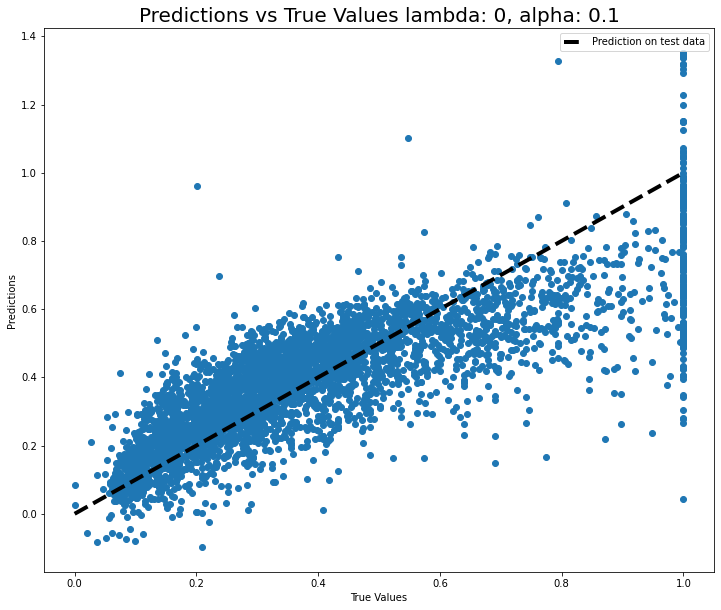

coeffs:  [ 0.39359575 -0.53083156 -0.46939891  0.11245801 -0.45691685  1.08137403
 -2.52711239  0.76344861  1.15061466  0.08498854  0.37998564  0.07907927
  0.09342947]


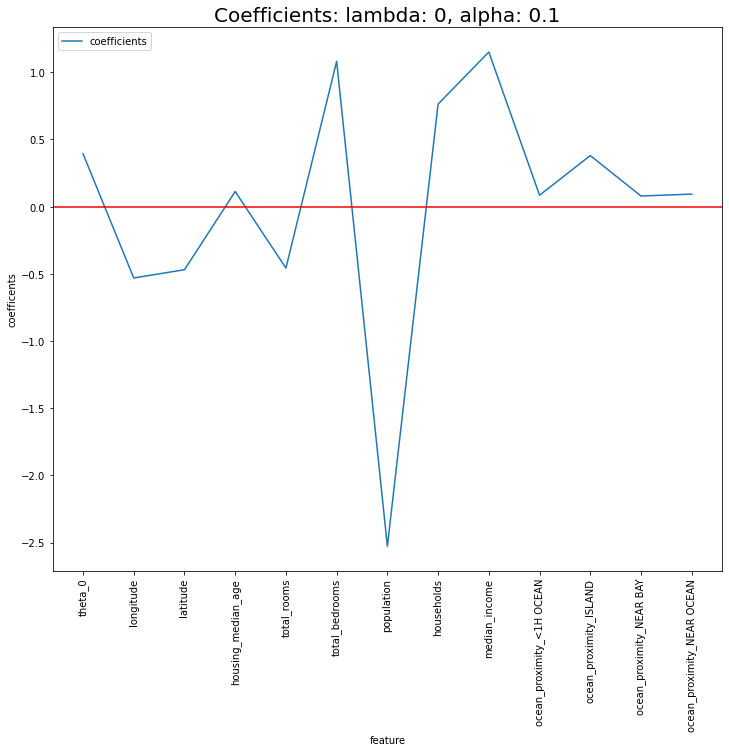

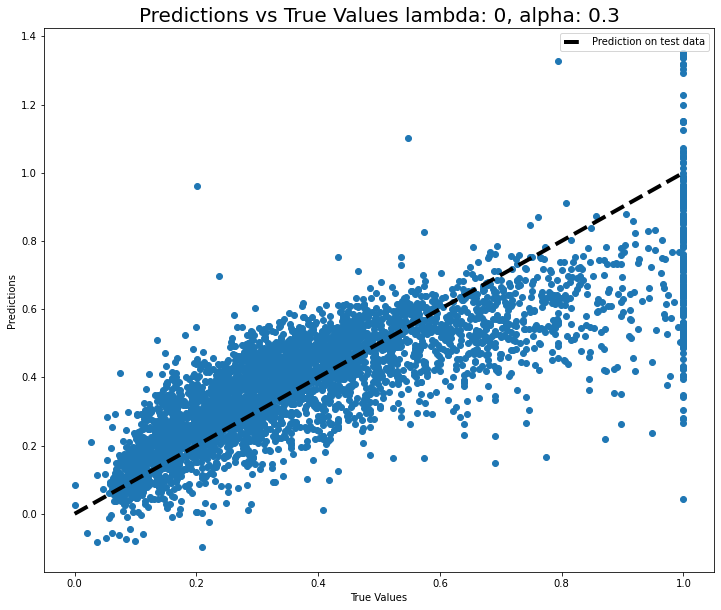

coeffs:  [ 0.39359575 -0.53083156 -0.46939891  0.11245801 -0.45691685  1.08137403
 -2.52711239  0.76344861  1.15061466  0.08498854  0.37998564  0.07907927
  0.09342947]


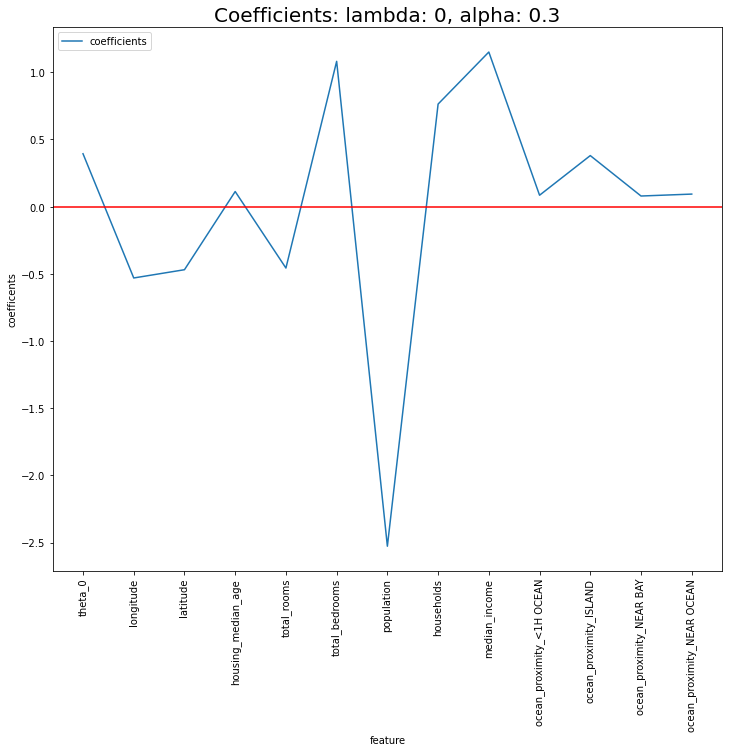

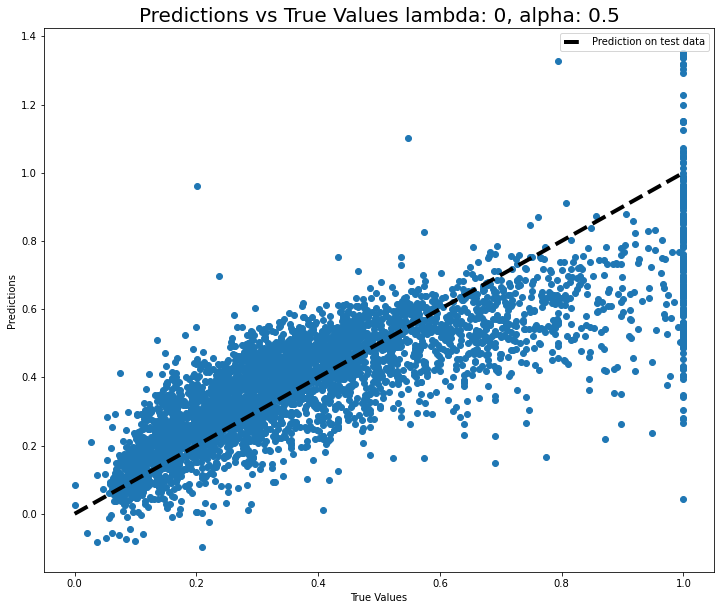

coeffs:  [ 0.39359575 -0.53083156 -0.46939891  0.11245801 -0.45691685  1.08137403
 -2.52711239  0.76344861  1.15061466  0.08498854  0.37998564  0.07907927
  0.09342947]


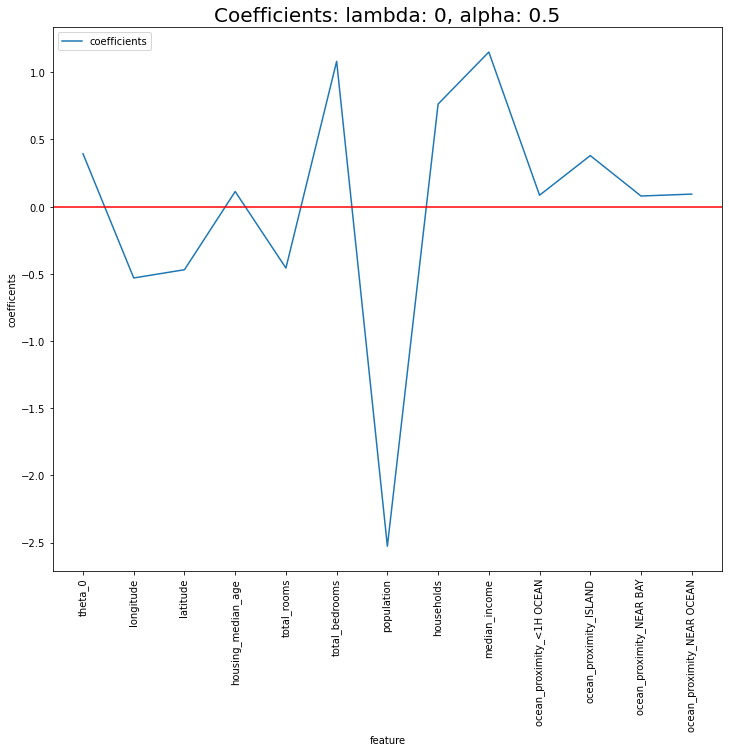

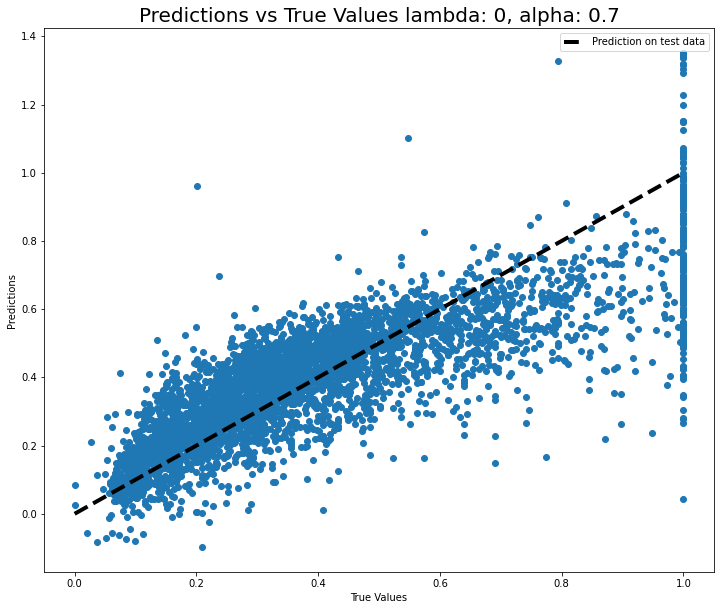

coeffs:  [ 0.39359575 -0.53083156 -0.46939891  0.11245801 -0.45691685  1.08137403
 -2.52711239  0.76344861  1.15061466  0.08498854  0.37998564  0.07907927
  0.09342947]


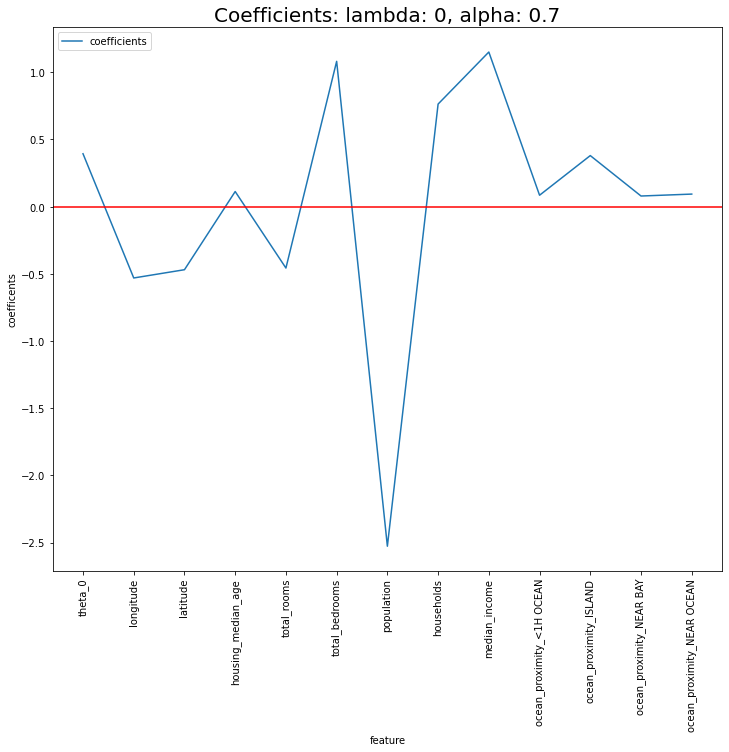

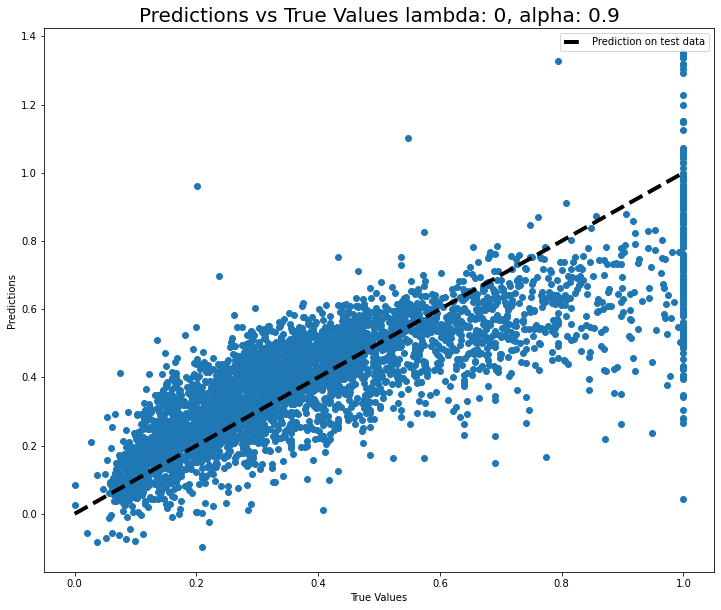

coeffs:  [ 0.39359575 -0.53083156 -0.46939891  0.11245801 -0.45691685  1.08137403
 -2.52711239  0.76344861  1.15061466  0.08498854  0.37998564  0.07907927
  0.09342947]


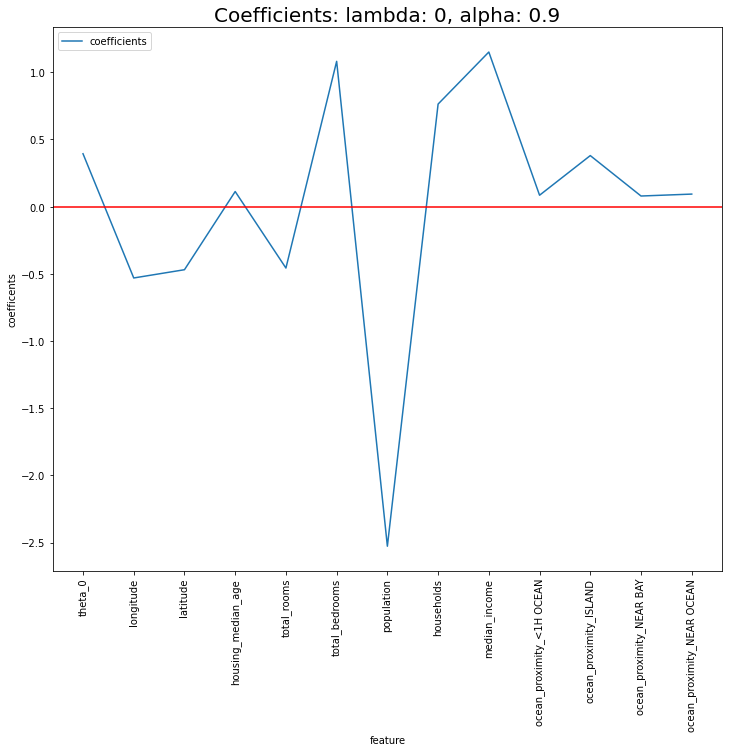

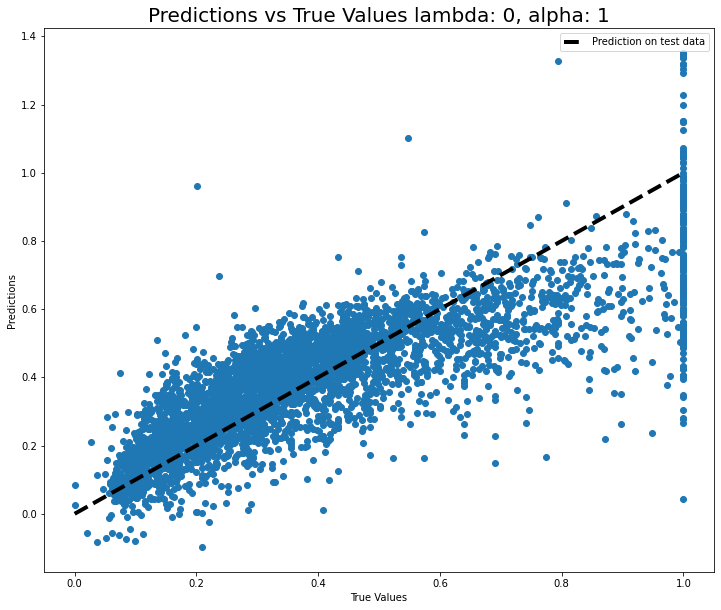

coeffs:  [ 0.39359575 -0.53083156 -0.46939891  0.11245801 -0.45691685  1.08137403
 -2.52711239  0.76344861  1.15061466  0.08498854  0.37998564  0.07907927
  0.09342947]


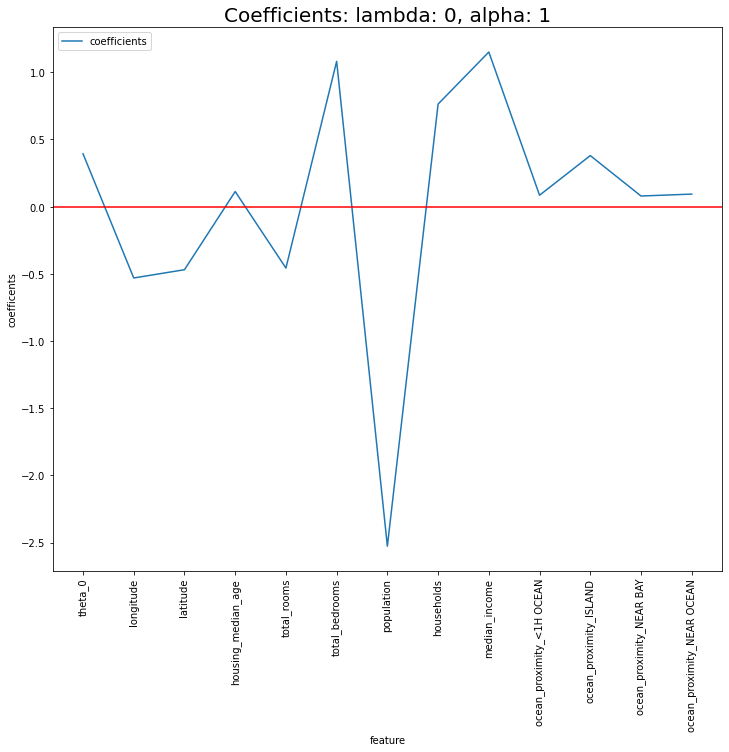

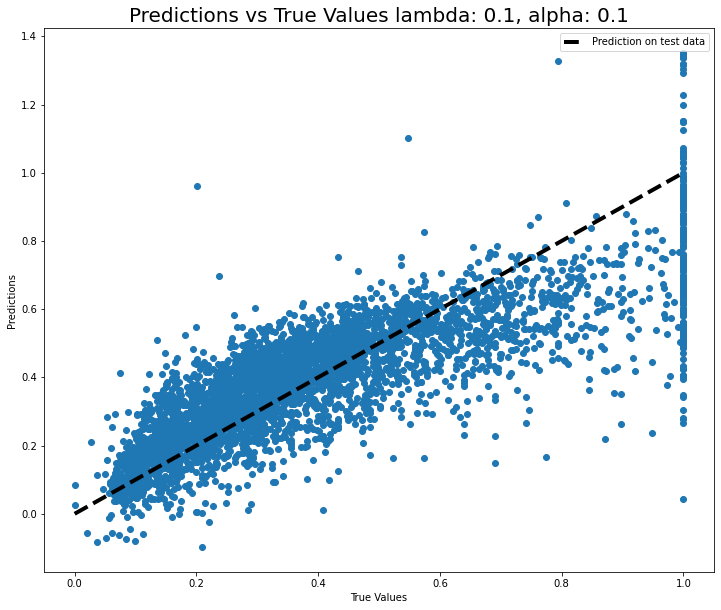

coeffs:  [ 0.39359575 -0.53083156 -0.46939891  0.11245801 -0.45691685  1.08137403
 -2.52711239  0.76344861  1.15061466  0.08498854  0.37998564  0.07907927
  0.09342947]


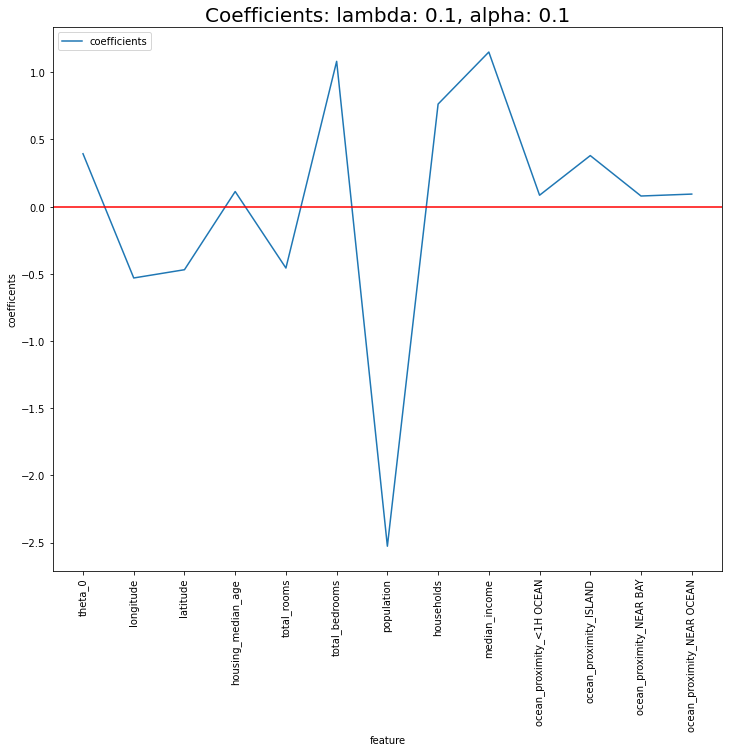

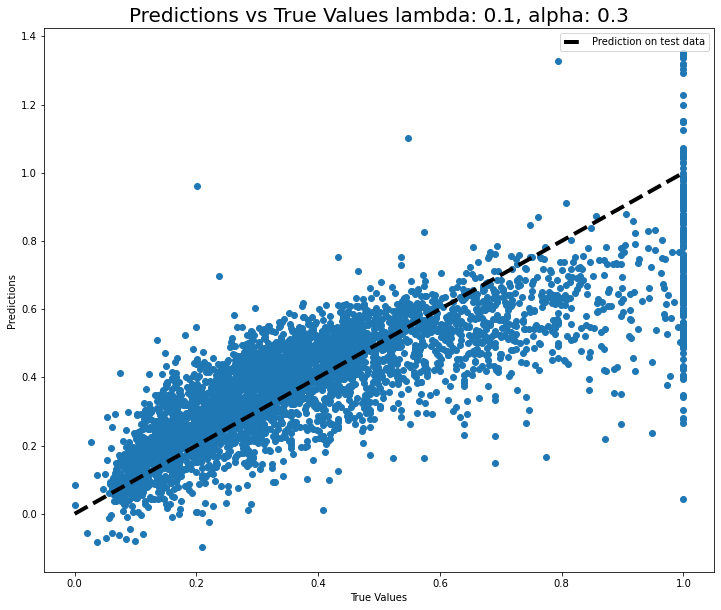

coeffs:  [ 0.39359575 -0.53083156 -0.46939891  0.11245801 -0.45691685  1.08137403
 -2.52711239  0.76344861  1.15061466  0.08498854  0.37998564  0.07907927
  0.09342947]


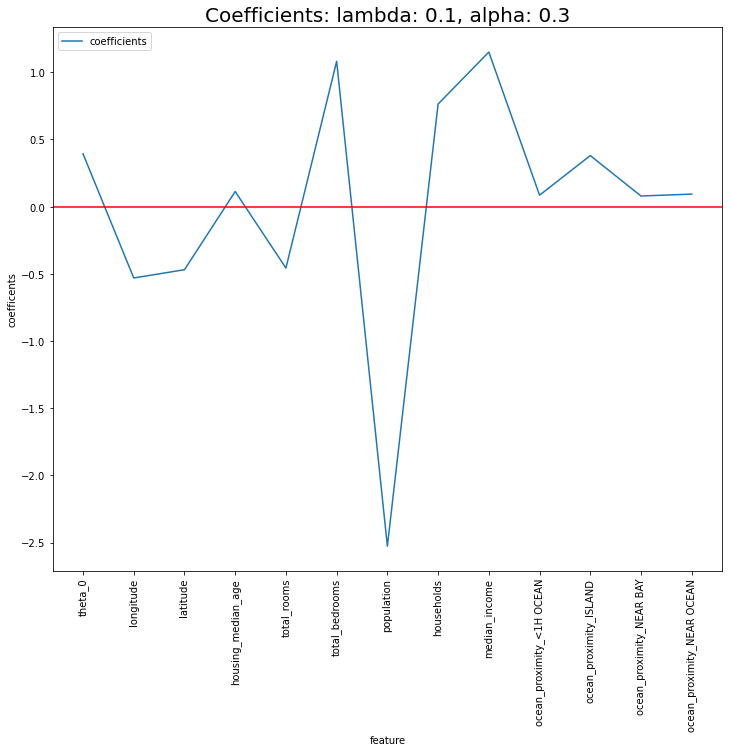

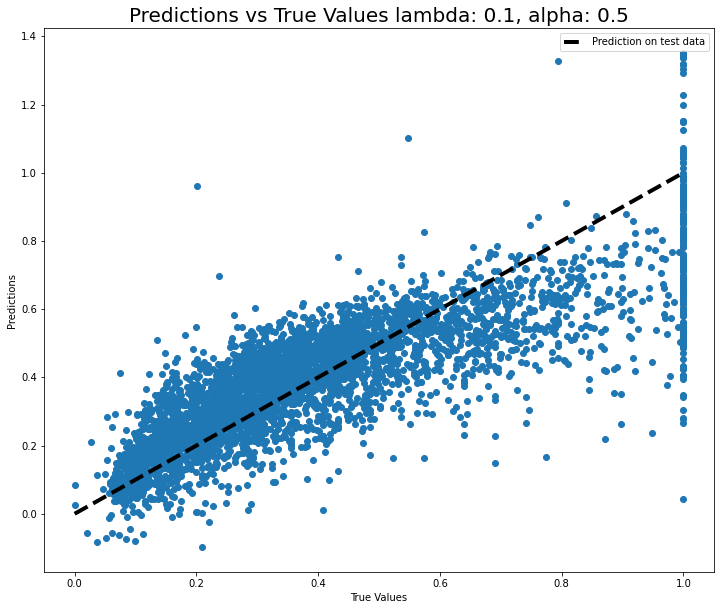

coeffs:  [ 0.39359575 -0.53083156 -0.46939891  0.11245801 -0.45691685  1.08137403
 -2.52711239  0.76344861  1.15061466  0.08498854  0.37998564  0.07907927
  0.09342947]


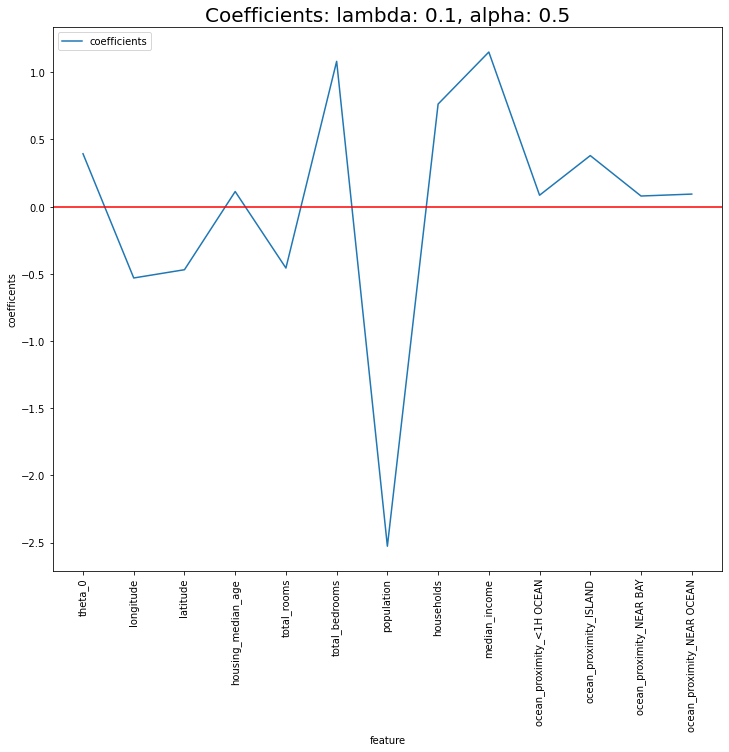

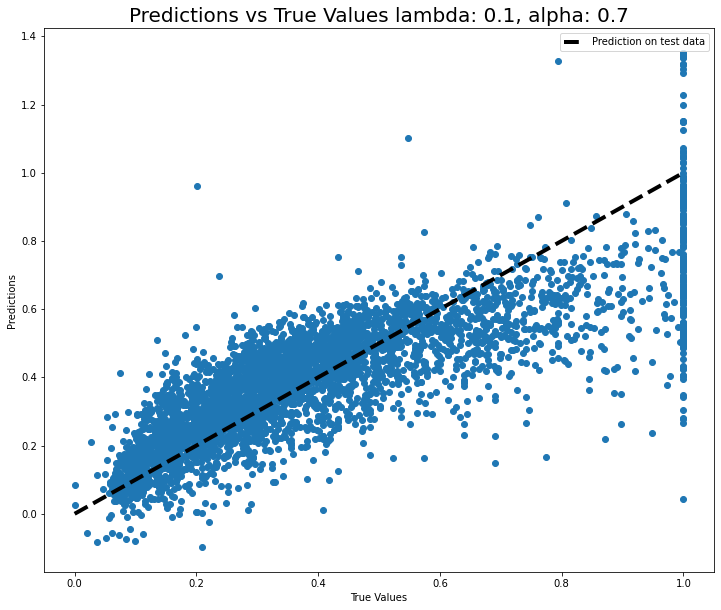

coeffs:  [ 0.39359575 -0.53083156 -0.46939891  0.11245801 -0.45691685  1.08137403
 -2.52711239  0.76344861  1.15061466  0.08498854  0.37998564  0.07907927
  0.09342947]


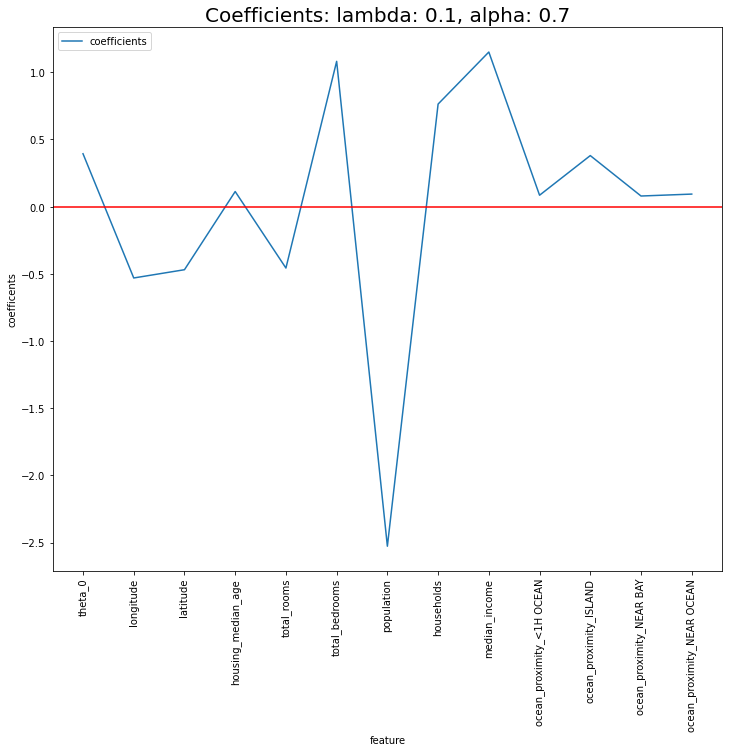

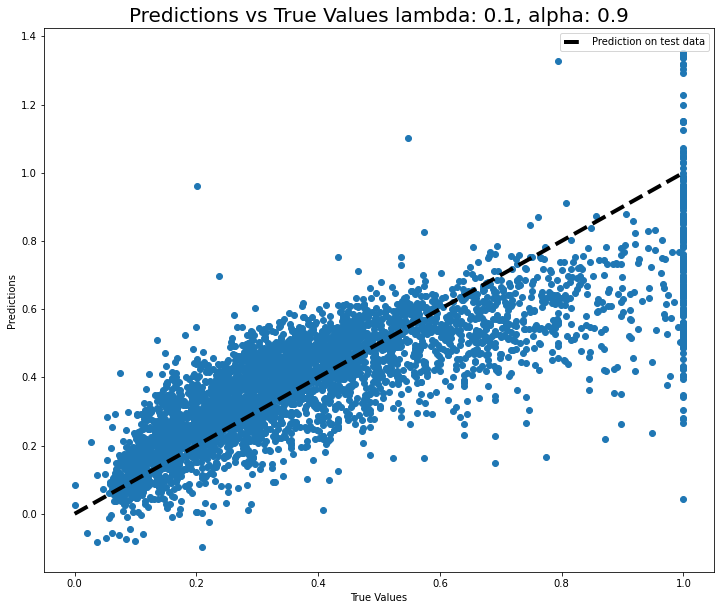

coeffs:  [ 0.39359575 -0.53083156 -0.46939891  0.11245801 -0.45691685  1.08137403
 -2.52711239  0.76344861  1.15061466  0.08498854  0.37998564  0.07907927
  0.09342947]


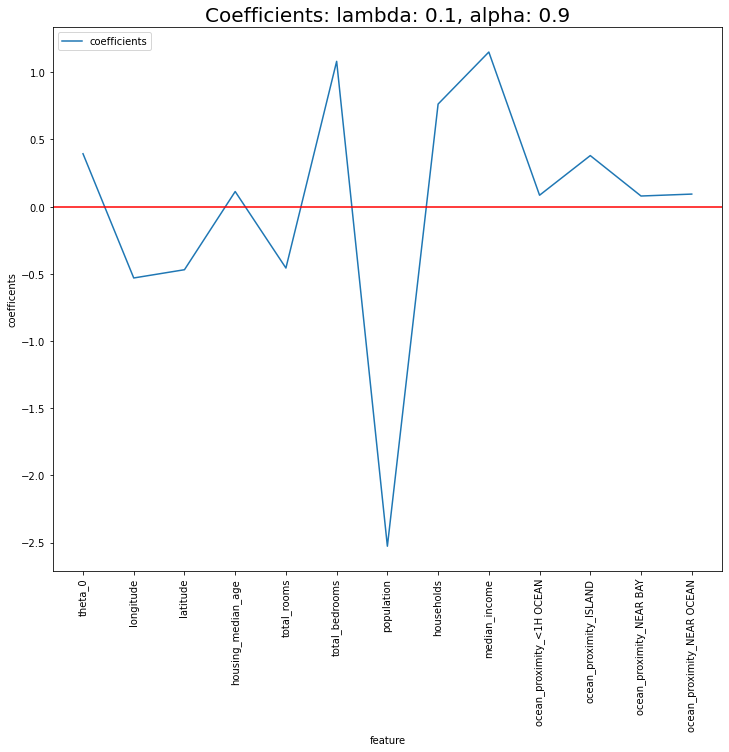

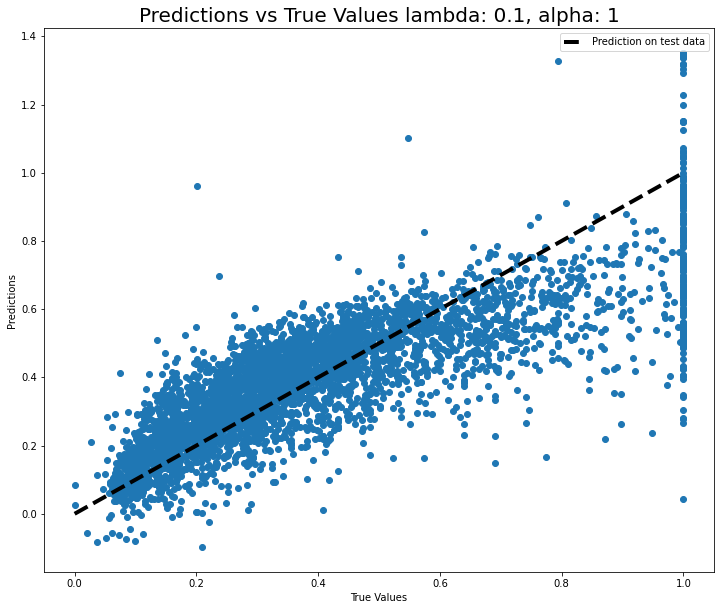

coeffs:  [ 0.39359575 -0.53083156 -0.46939891  0.11245801 -0.45691685  1.08137403
 -2.52711239  0.76344861  1.15061466  0.08498854  0.37998564  0.07907927
  0.09342947]


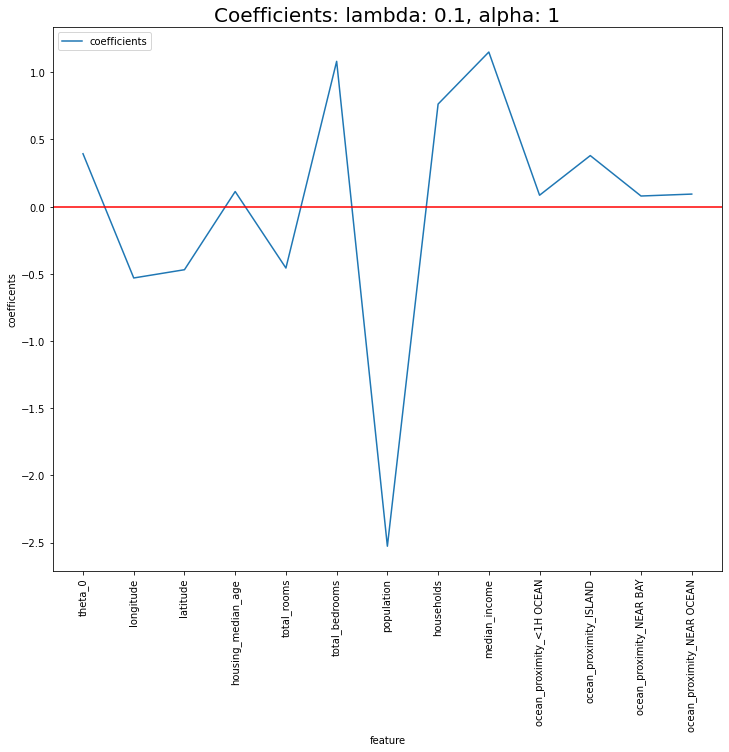

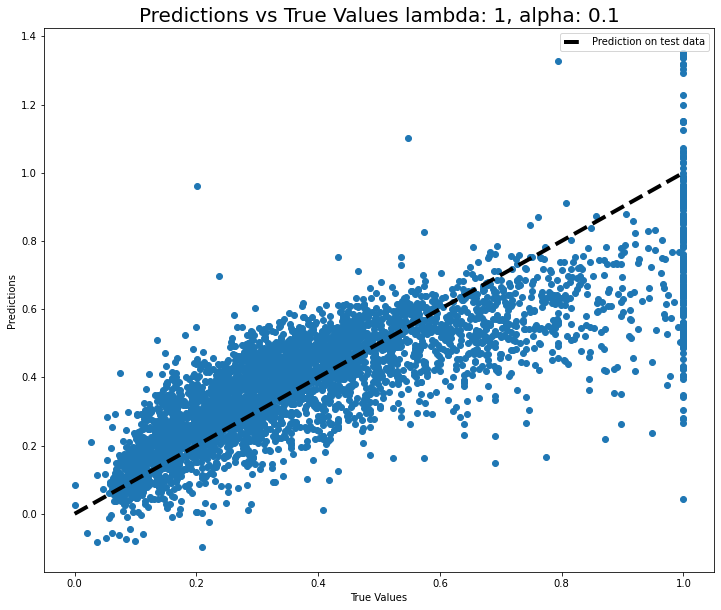

coeffs:  [ 0.39359575 -0.53083156 -0.46939891  0.11245801 -0.45691685  1.08137403
 -2.52711239  0.76344861  1.15061466  0.08498854  0.37998564  0.07907927
  0.09342947]


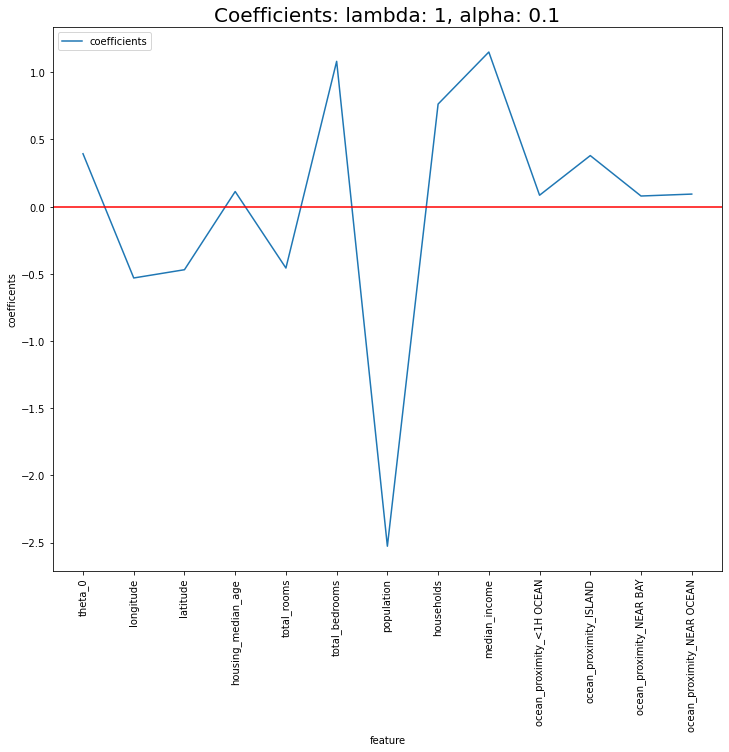

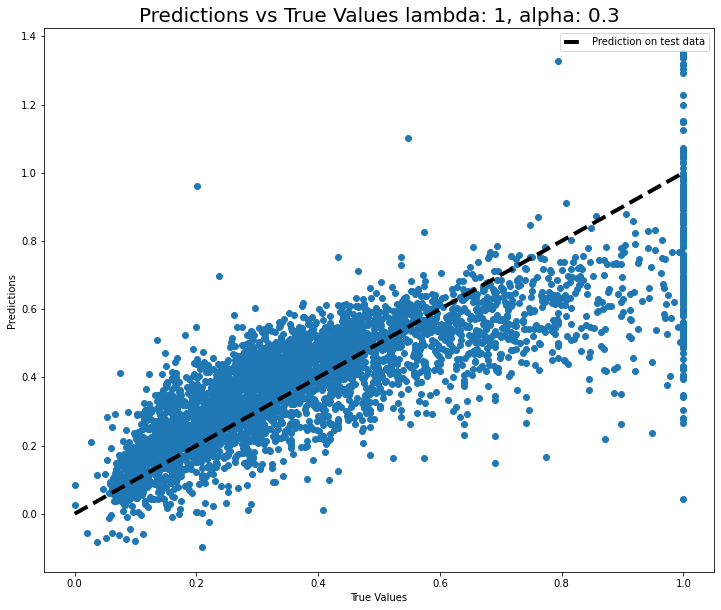

coeffs:  [ 0.39359575 -0.53083156 -0.46939891  0.11245801 -0.45691685  1.08137403
 -2.52711239  0.76344861  1.15061466  0.08498854  0.37998564  0.07907927
  0.09342947]


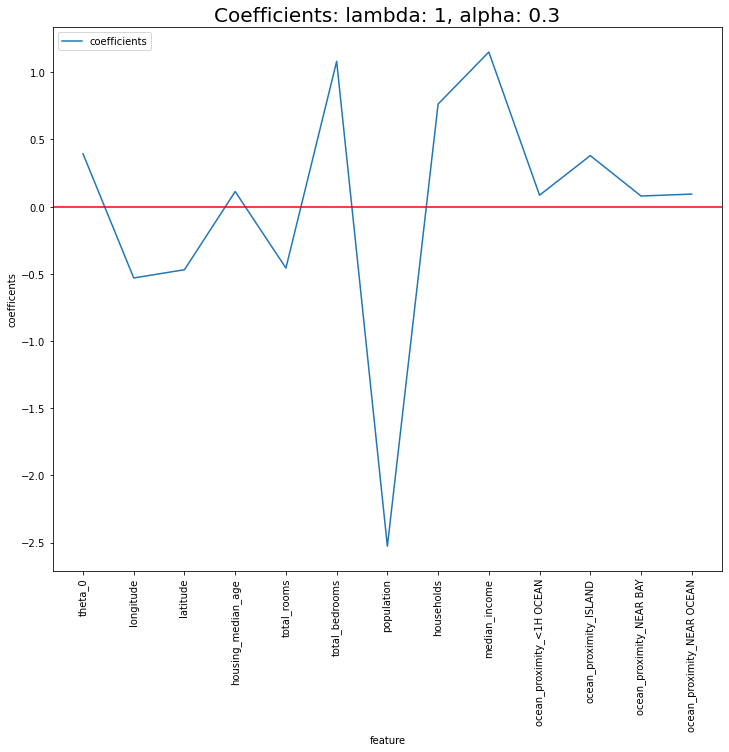

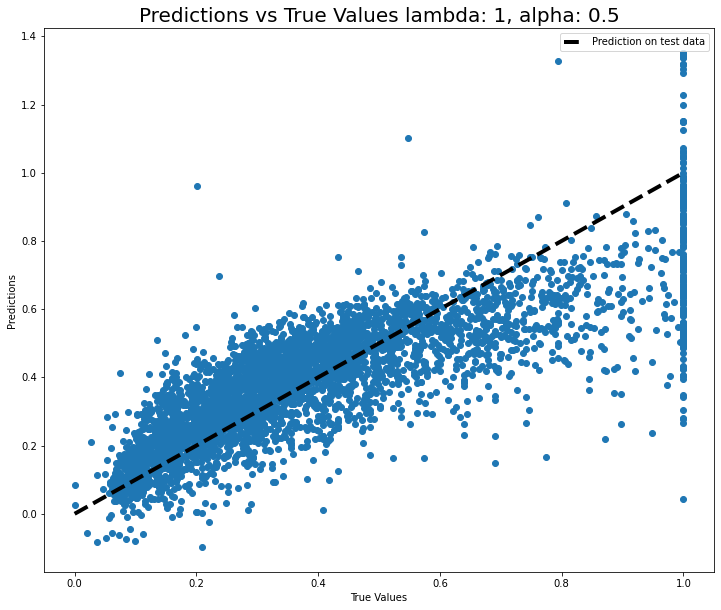

coeffs:  [ 0.39359575 -0.53083156 -0.46939891  0.11245801 -0.45691685  1.08137403
 -2.52711239  0.76344861  1.15061466  0.08498854  0.37998564  0.07907927
  0.09342947]


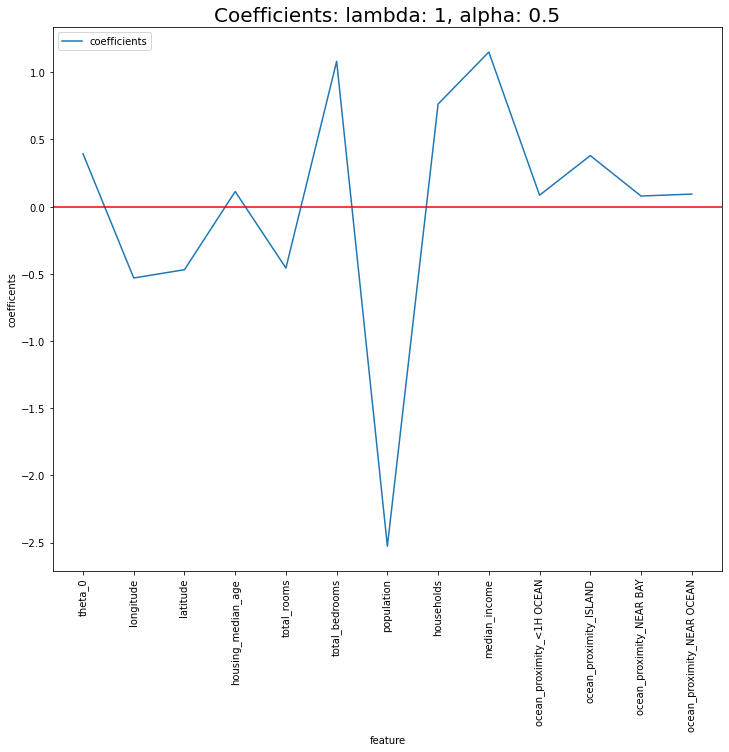

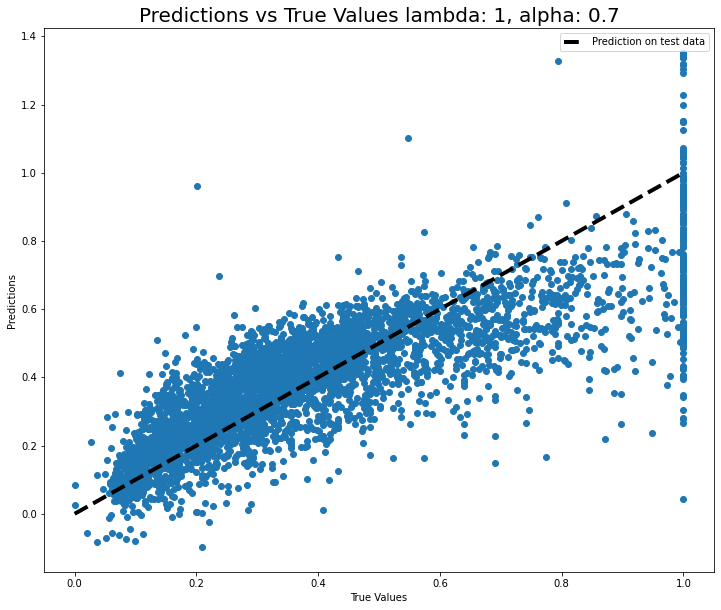

coeffs:  [ 0.39359575 -0.53083156 -0.46939891  0.11245801 -0.45691685  1.08137403
 -2.52711239  0.76344861  1.15061466  0.08498854  0.37998564  0.07907927
  0.09342947]


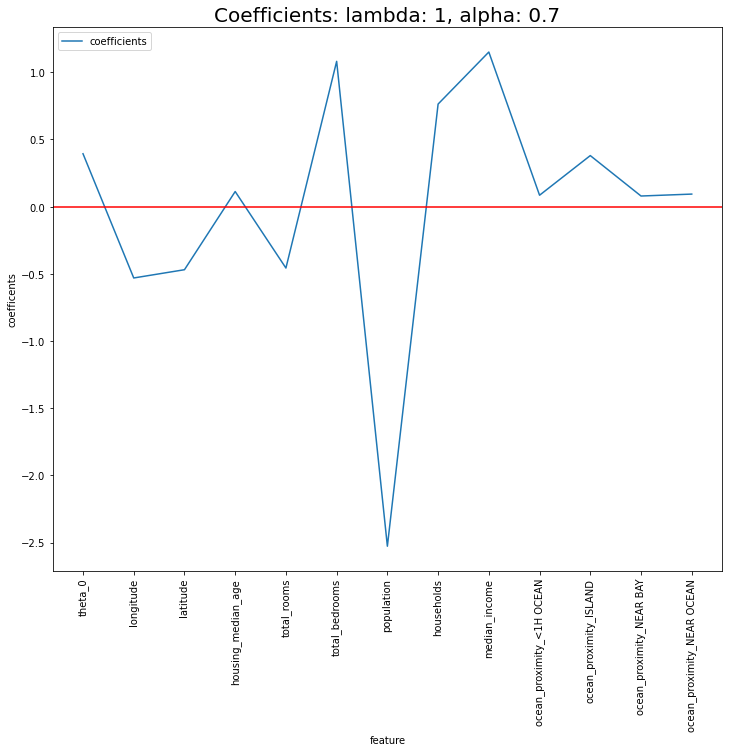

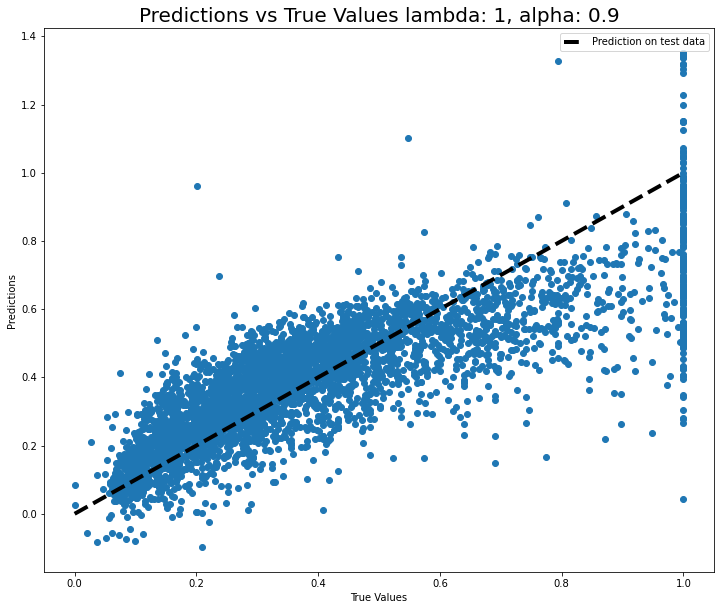

coeffs:  [ 0.39359575 -0.53083156 -0.46939891  0.11245801 -0.45691685  1.08137403
 -2.52711239  0.76344861  1.15061466  0.08498854  0.37998564  0.07907927
  0.09342947]


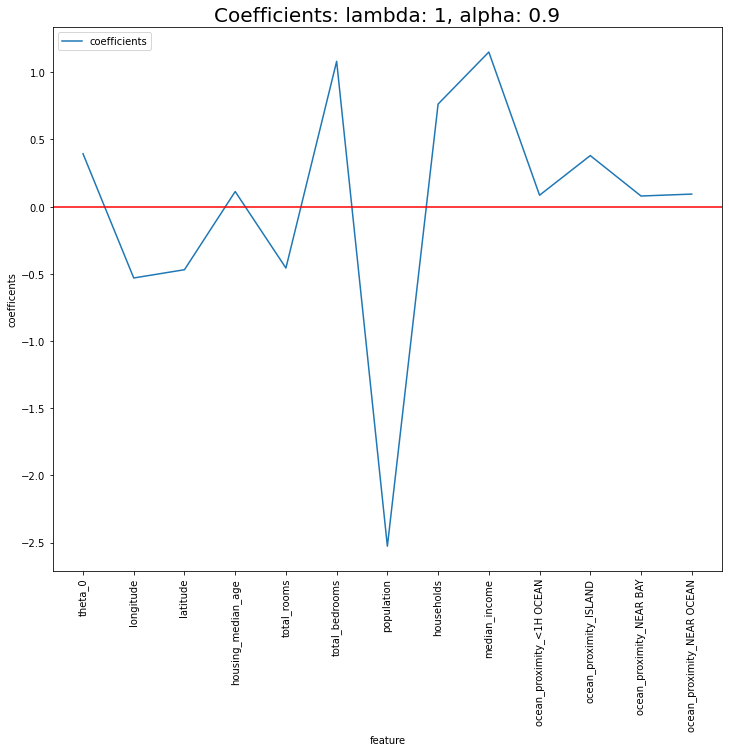

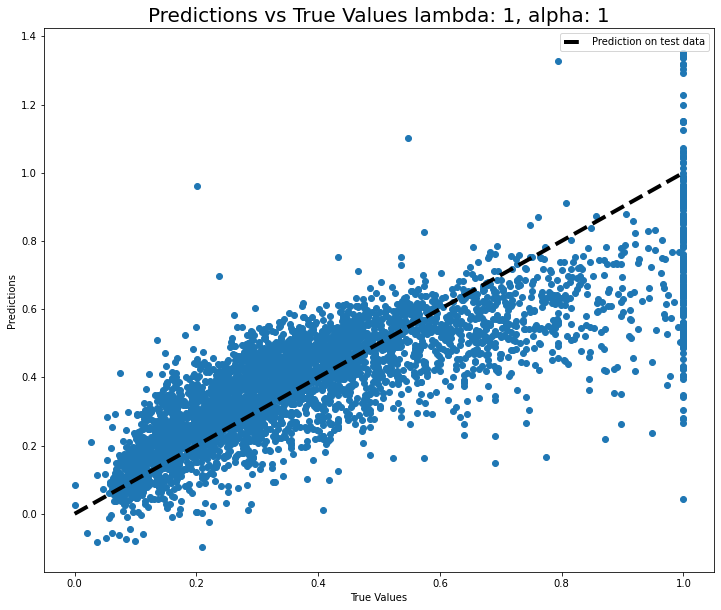

coeffs:  [ 0.39359575 -0.53083156 -0.46939891  0.11245801 -0.45691685  1.08137403
 -2.52711239  0.76344861  1.15061466  0.08498854  0.37998564  0.07907927
  0.09342947]


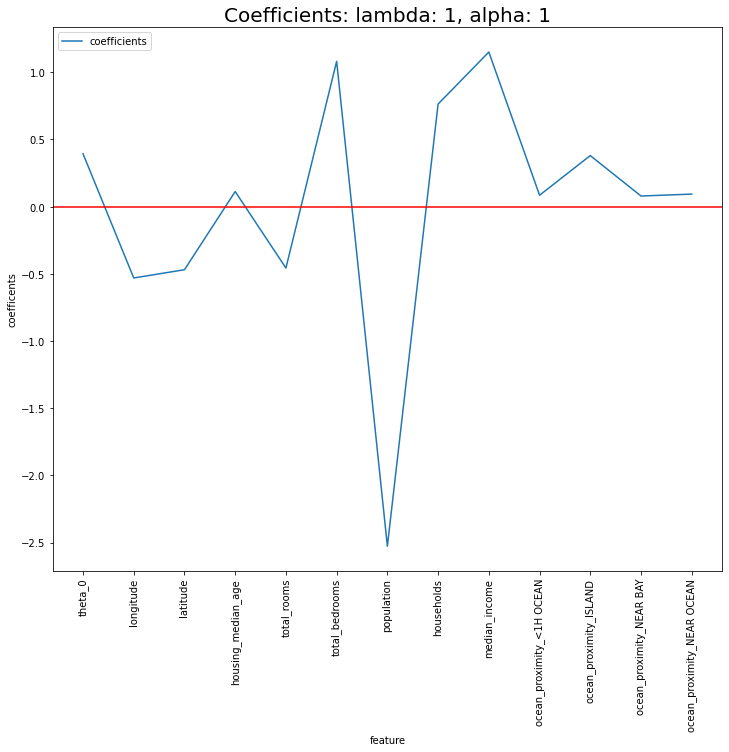

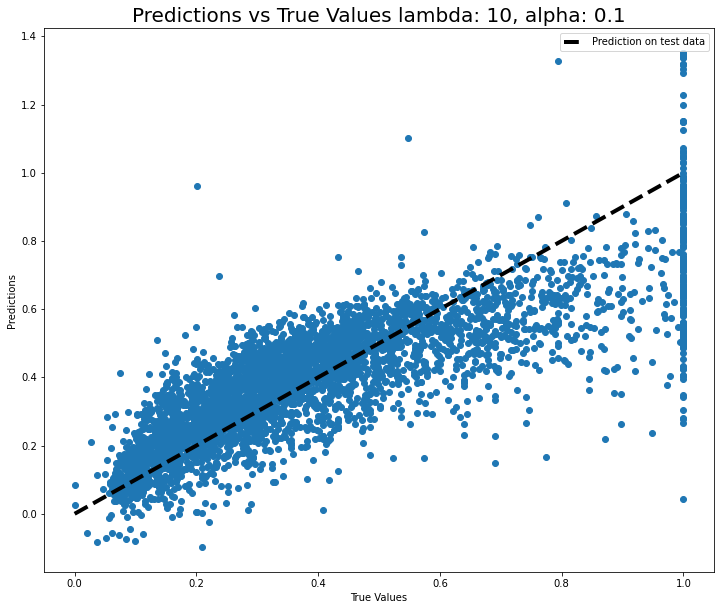

coeffs:  [ 0.39359575 -0.53083156 -0.46939891  0.11245801 -0.45691685  1.08137403
 -2.52711239  0.76344861  1.15061466  0.08498854  0.37998564  0.07907927
  0.09342947]


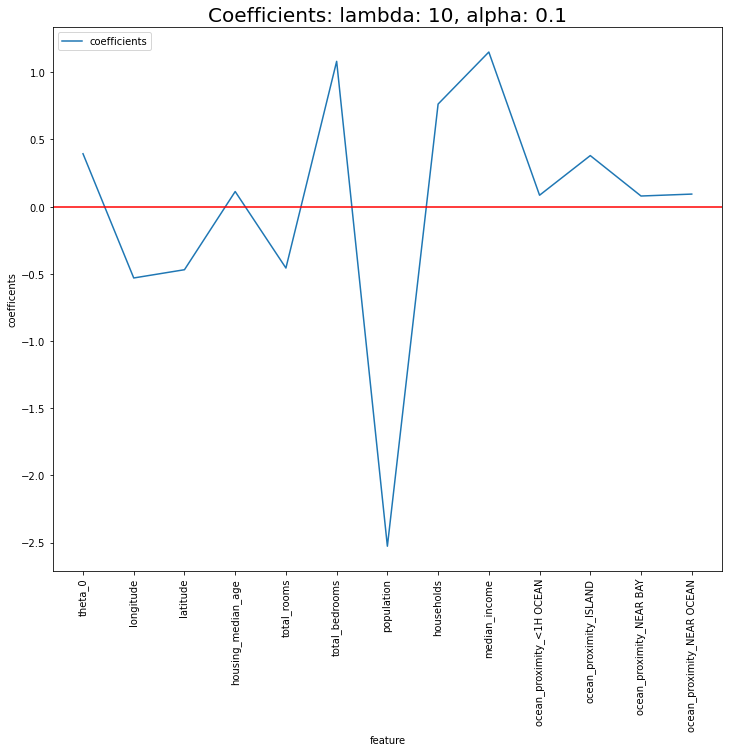

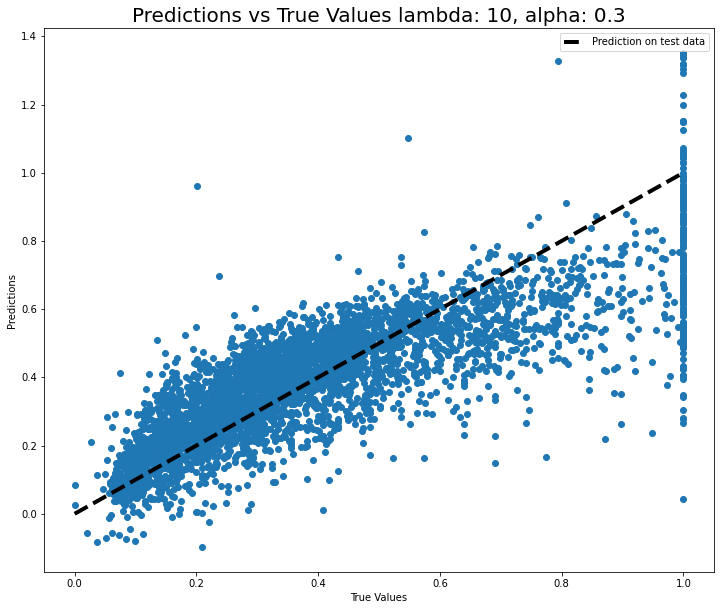

coeffs:  [ 0.39359575 -0.53083156 -0.46939891  0.11245801 -0.45691685  1.08137403
 -2.52711239  0.76344861  1.15061466  0.08498854  0.37998564  0.07907927
  0.09342947]


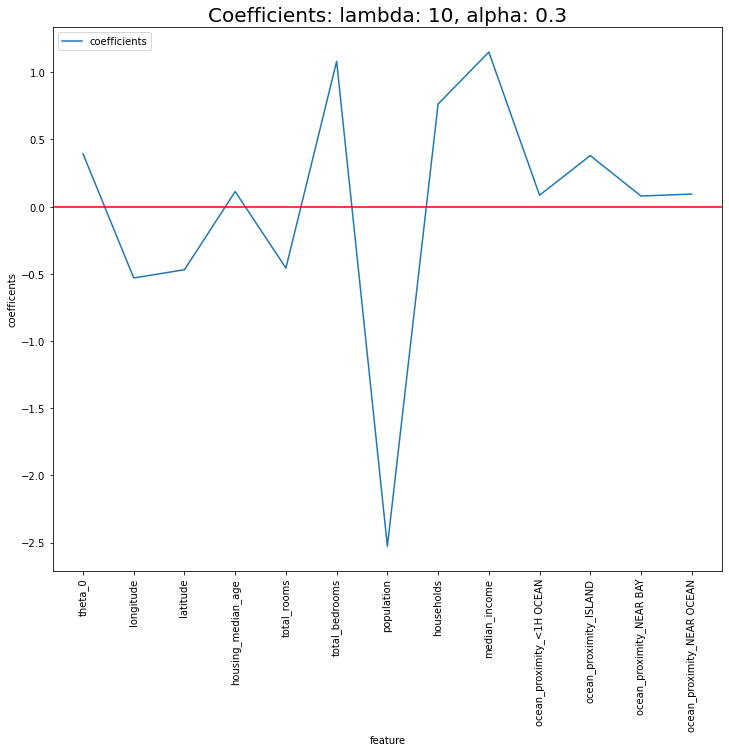

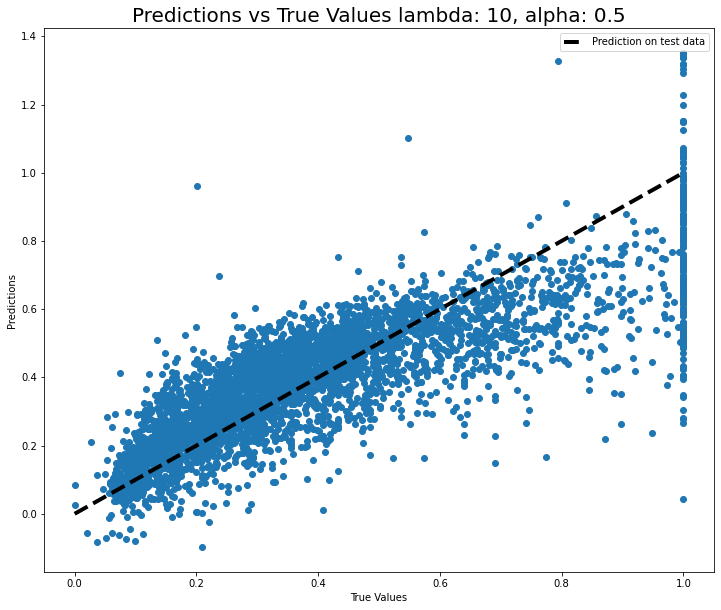

coeffs:  [ 0.39359575 -0.53083156 -0.46939891  0.11245801 -0.45691685  1.08137403
 -2.52711239  0.76344861  1.15061466  0.08498854  0.37998564  0.07907927
  0.09342947]


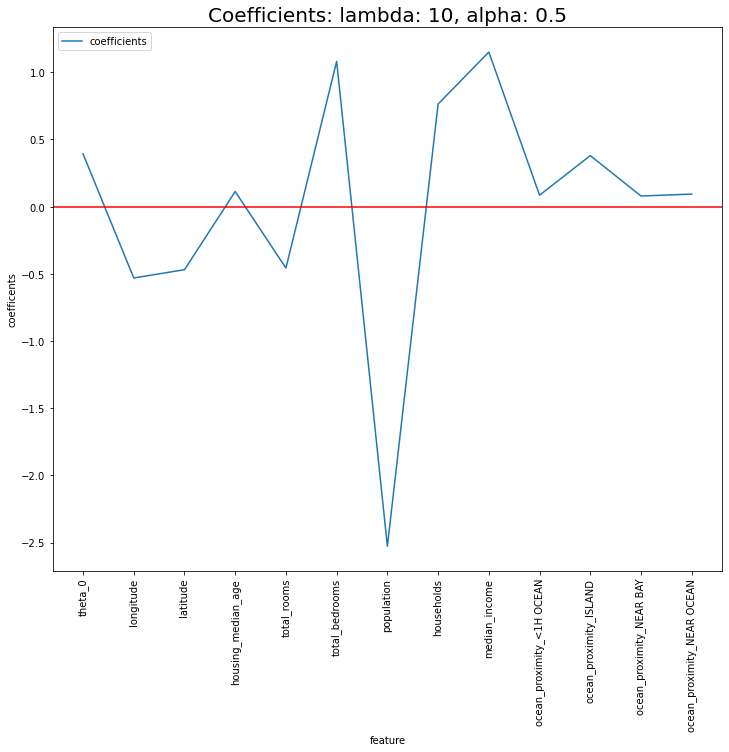

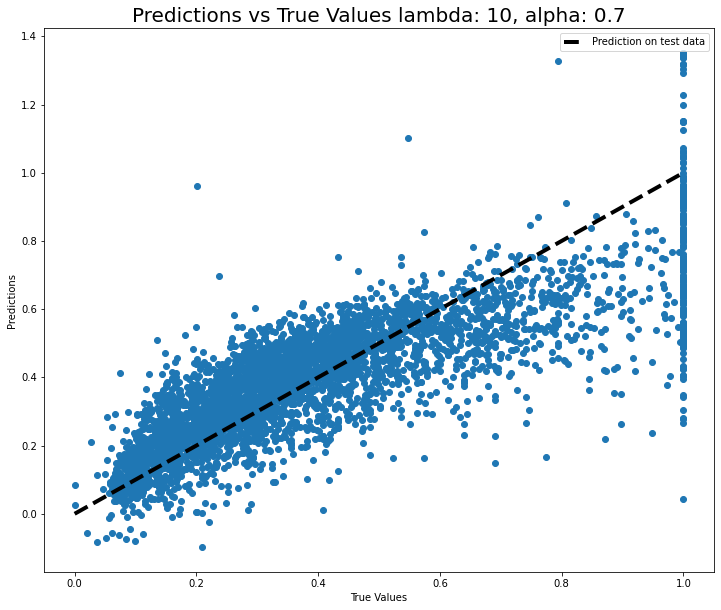

coeffs:  [ 0.39359575 -0.53083156 -0.46939891  0.11245801 -0.45691685  1.08137403
 -2.52711239  0.76344861  1.15061466  0.08498854  0.37998564  0.07907927
  0.09342947]


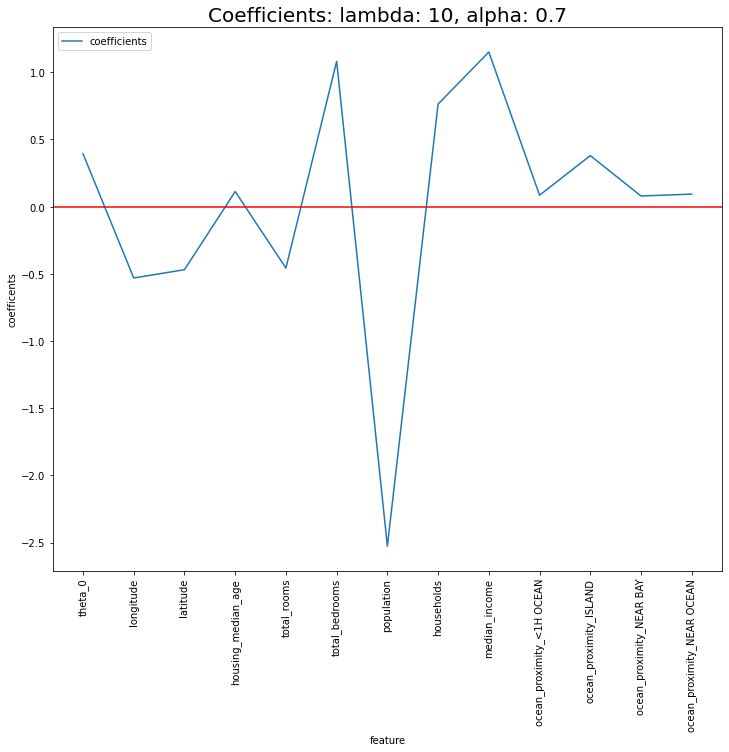

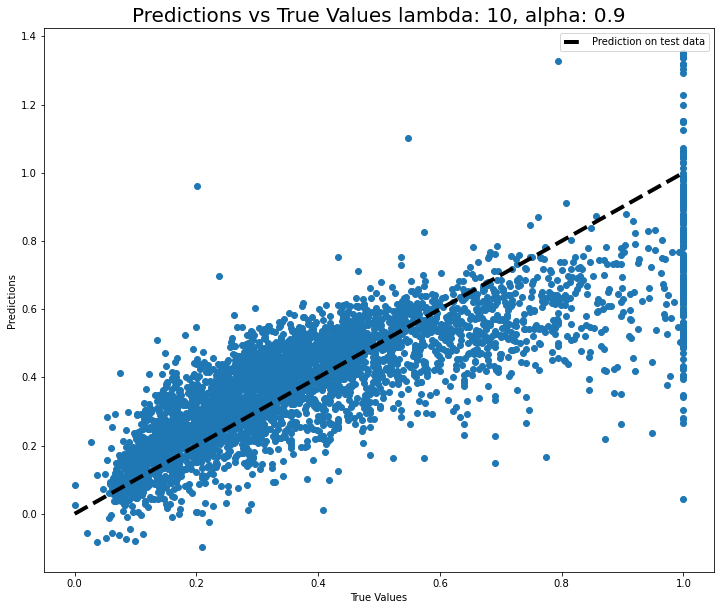

coeffs:  [ 0.39359575 -0.53083156 -0.46939891  0.11245801 -0.45691685  1.08137403
 -2.52711239  0.76344861  1.15061466  0.08498854  0.37998564  0.07907927
  0.09342947]


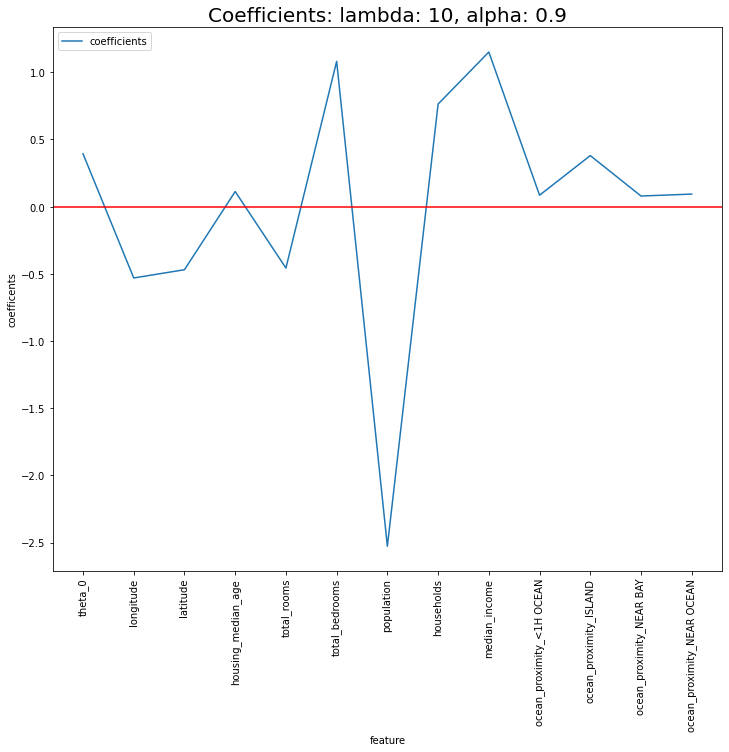

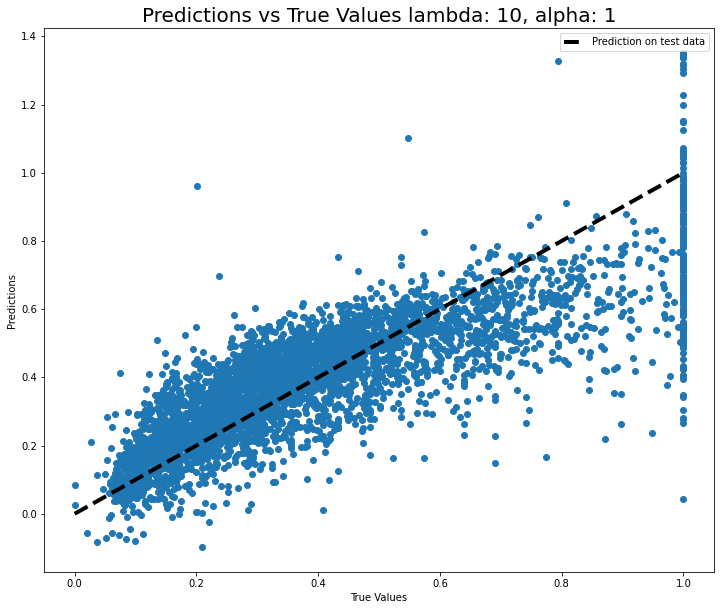

coeffs:  [ 0.39359575 -0.53083156 -0.46939891  0.11245801 -0.45691685  1.08137403
 -2.52711239  0.76344861  1.15061466  0.08498854  0.37998564  0.07907927
  0.09342947]


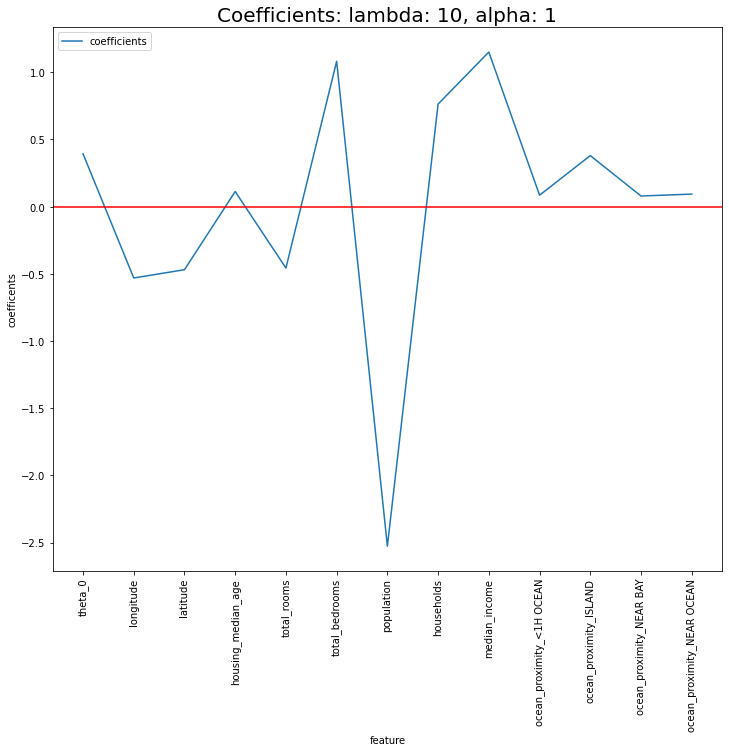

In [87]:
# show report_list as a dataframe
report_df = pd.DataFrame(report_list)
report_df

# TypeError: setting an array element with a sequence.
# coeffs = pd.DataFrame({'coeff': report_df['theta'], 'coeff_std': np.std(report_df['theta_history'])})
# coeffs = pd.DataFrame({'coeff': report_df['theta']})
# coeffs["coeff"] = coeffs["coeff"].apply(lambda x: np.round(x, 2))
# #unpack coeffs 
# coeffs_list = coeffs['coeff'].tolist()
# print(*coeffs.iloc[0].reset_index(drop=True))

for i in range(len(report_list)):
    plt.figure(figsize=(12, 10))
    plt.plot(report_list[i]["loss_histoy"], label="loss")
    plt.xlabel("iteration")
    plt.ylabel("loss")
    plt.legend()
    plt.title("Loss graph: lambda: {}, alpha: {}".format(report_list[i]["regularization_parameter"], report_list[i]["alpha"]), fontsize=20)
    plt.savefig("./images/lambda_{}_alpha_{}_loss.png".format(report_list[i]["regularization_parameter"], report_list[i]["alpha"]))
    plt.close()
#     plt.show()

    plt.figure(figsize=(12, 10))
    plt.scatter(y_test, hypothesis(x_test, report_list[i]["theta"]))
    # normalize plot to show the same scale
    # plt.plot([0, 1], [0, 1], 'k--')
    plt.plot([y_test.min(), y_test.max()], [
         y_test.min(), y_test.max()], 'k--', lw=4, label='Prediction on test data') 

    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.legend()
    plt.title('Predictions vs True Values lambda: {}, alpha: {}'.format(report_list[i]["regularization_parameter"], report_list[i]["alpha"]), fontsize=20)
    plt.savefig("./images/lambda_{}_alpha_{}_theta.png".format(report_list[i]["regularization_parameter"], report_list[i]["alpha"]))
    # plt.close()
    plt.show()

    coeffs = report_list[i]["theta_history"][-1]

    print("coeffs: ", coeffs)

    plt.figure(figsize=(12, 10))
    plt.plot(range(len(coeffs)), coeffs, label="coeff")
    plt.axhline(0, color='r', linestyle='solid')         # draw a horizontal line at y = 0
    plt.xticks(range(len(feature_columns)), feature_columns, rotation=90) # set the x ticks with names of columns
    plt.xlabel("feature")
    plt.ylabel("coefficents")
    plt.legend(["coefficients"], loc="upper left")
    plt.title("Coefficients: lambda: {}, alpha: {}".format(report_list[i]["regularization_parameter"], report_list[i]["alpha"]), fontsize=20)
    plt.savefig("./images/lambda_{}_alpha_{}_coeffients.png".format(report_list[i]["regularization_parameter"], report_list[i]["alpha"]))
    plt.show()
    # plt.close()





In [8]:
np.mean(loss_histoy[-50:])
mean_w = np.array(loss_histoy[-50:])
# if more than half of the mean_w values are greater than the np.mean(loss_history[-50:]), then we have to stop
size = int(len(mean_w) * 0.7)
randomly_selected = np.random.choice(mean_w, size , replace=False)

if randomly_selected[-1:] > np.mean(mean_w):
    print(randomly_selected)

Error on test set: 
         mse      rmse       mae      mape  r_squared
0  0.021407  0.146311  0.105633  0.329554   0.624752


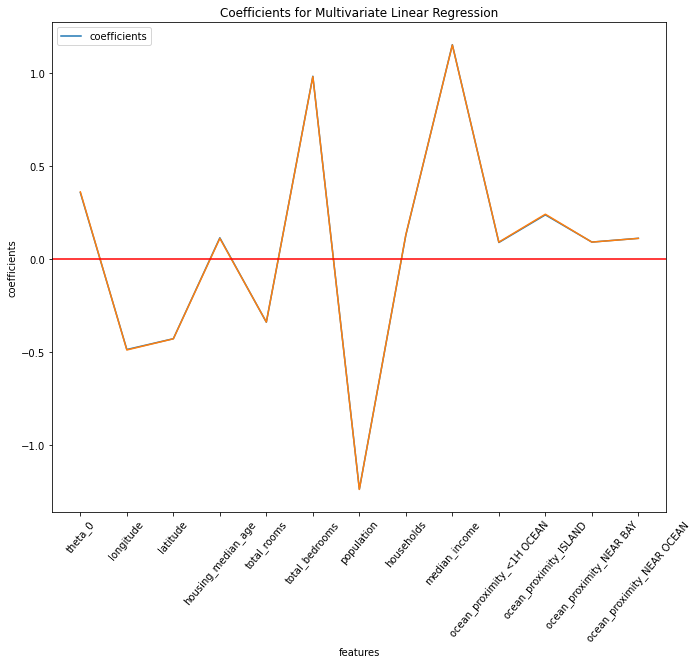

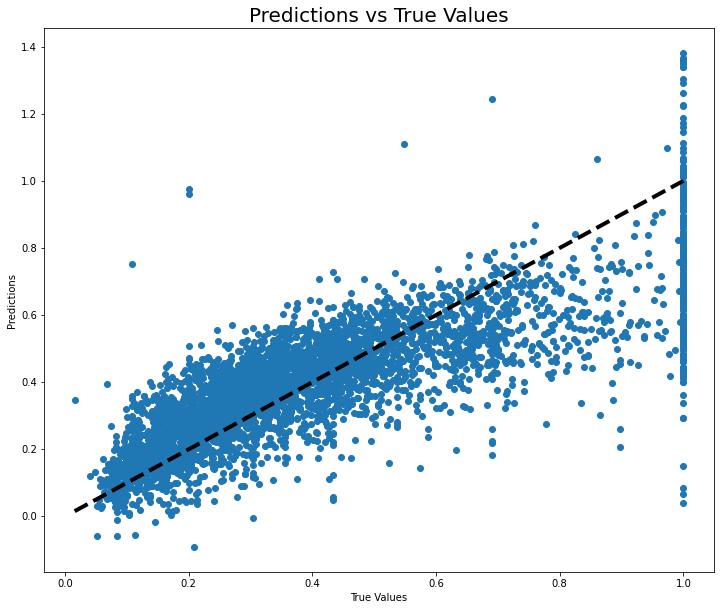

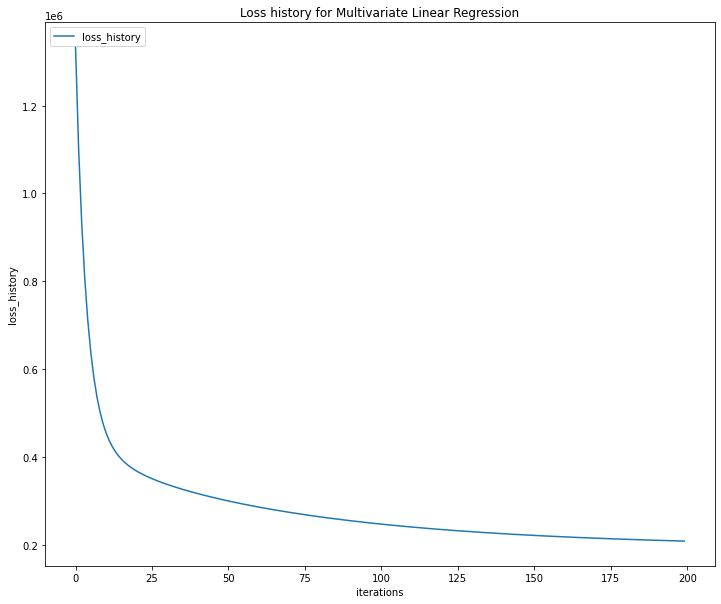

In [9]:
y_predict = hypothesis(x_test, theta)
y_test = np.array(y_test).reshape(y_test.shape[0],)

report_error = pd.DataFrame({"mse": [calculate_mse(y_predict, y_test)], "rmse": [calculate_rmse(y_predict, y_test)], "mae": [
                            calculate_mae(y_predict, y_test)], "mape": [calculate_mape(y_predict, y_test)], "r_squared": [calculate_r_squared(y_predict, y_test)]})
print("Error on test set: \n", report_error)

# report = report_difference(y_predict, y_test)
# report_diff_mean = report_difference_mean(report)
# print(report)
# print("difference mean: ",report_diff_mean)
# print(theta_history[:10]) 

coeffs = pd.DataFrame({"theta": theta_history[-1], "coeff": theta_history[-1]})
coeffs["coeff"] = coeffs["coeff"].apply(lambda x: np.round(x, 2))
# print(coeffs)

# for i in range(10):
#     plt.figure(figsize=(10, 6))
#     plt.scatter(y_test, hypothesis(x_test, theta_history[i]))
#     clear_output(wait=True)
#     plt.plot([y_test.min(), y_test.max()], [y_predict.min(), y_predict.max()], 'k--', lw=4)
#     # plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
#     plt.xlabel('True Values')
#     plt.ylabel('Predictions')
#     # save images in ./images 
#     plt.savefig("./images/plot_" + str(i) + ".png")

loss_function_with_last_theta = loss_function(x_train, y_train, theta_history[-1])

# rescale coeffs to 0-1 range
# coeffs["coeff"] = coeffs["coeff"].apply(lambda x: (x - min(coeffs["coeff"])) / (max(coeffs["coeff"]) - min(coeffs["coeff"])))

# ffmpeg -framerate 30 -pattern_type glob -i 'plot_*.png' -c:v libx264 -pix_fmt yuv420p out.mp4 ####30 fps####
# import subprocess
# subprocess.call(["ffmpeg", "-framerate", "30", "-pattern_type", "glob", "-i", "plot_*.png", "-c:v", "libx264", "-pix_fmt", "yuv420p", "out.mp4"])

# print(">===================== Figures =====================<")
# default plot
plt.figure(figsize=(11, 9))
plt.plot(range(len(coeffs)), coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_columns)), feature_columns, rotation=50)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title("Coefficients for Multivariate Linear Regression")
plt.legend(["coefficients"], loc="upper left")
plt.show()

plt.figure(figsize=(12, 10))
plt.scatter(y_test, y_predict)
plt.plot([y_test.min(), y_test.max()], [
         y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs True Values', fontsize=20)
plt.show()

loss_histoy = loss_histoy[:200]

# use .1 of the loss_history for xticks and .1 of the loss_history for yticks
plt.figure(figsize=(12, 10))
plt.plot(range(len(loss_histoy)), loss_histoy)
# plt.axhline(0, color='r', linestyle='solid')
# plt.xticks([])
# plt.xticks(range(len(loss_histoy)), range(len(loss_histoy)), rotation=50)
plt.xlabel("iterations")
plt.ylabel("loss_history")
plt.title("Loss history for Multivariate Linear Regression")
plt.legend(["loss_history"], loc="upper left")
plt.show()
# print(">===================================================<")

## Q1 - Part H

Intial theta shape:  15 
 Intial theta:  [0.45870181 0.75122324 0.62520795 0.26118484 0.93000734 0.68121598
 0.86560607 0.88351714 0.79034249 0.62894401 0.82442214 0.16823459
 0.28767881 0.62027892 0.52131901]
H(x) = 0.46 + 0.75*x_1 + 0.63*x_2 + 0.26*x_3 + 0.93*x_4 + 0.68*x_5 + 0.87*x_6 + 0.88*x_7 + 0.79*x_8 + 0.63*x_9 + 0.82*x_10 + 0.17*x_11 + 0.29*x_12 + 0.62*x_13 + 0.52*x_14


  0%|          | 0/10000 [00:00<?, ?it/s]

last theta:  [ 3.96159750e-01 -5.40222402e-01 -4.78291707e-01  1.10199832e-01
 -3.73233185e-01  7.83742154e-01 -1.69200519e+00  5.48880543e-01
  1.13550232e+00  8.48603004e-02  6.21450317e-01  8.41798448e-02
  9.80751699e-02  7.74662581e-04  3.86054381e-01]
Error on test set: 
         mse      rmse      mae  mape  r_squared
0  0.021057  0.145109  0.10427   inf   0.649057


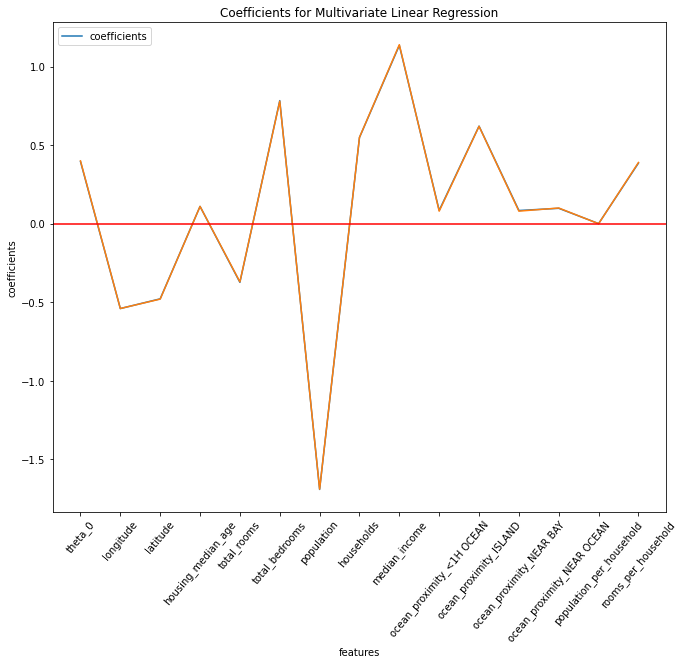

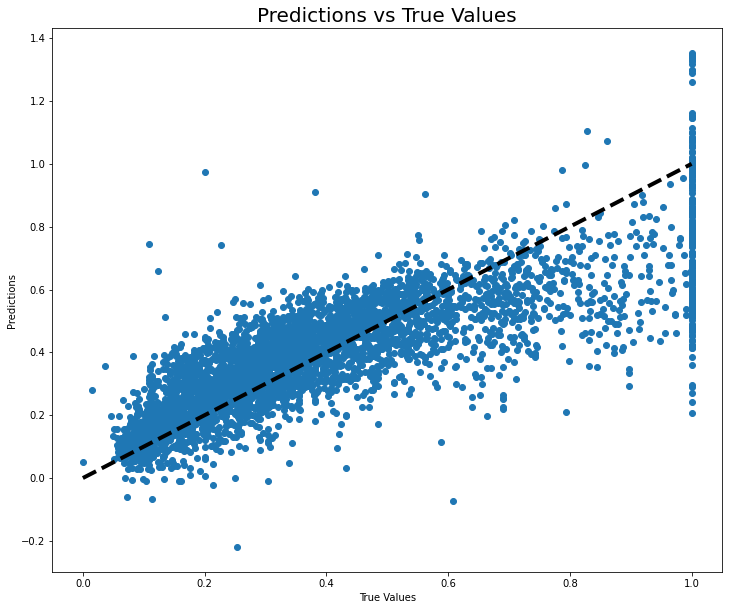

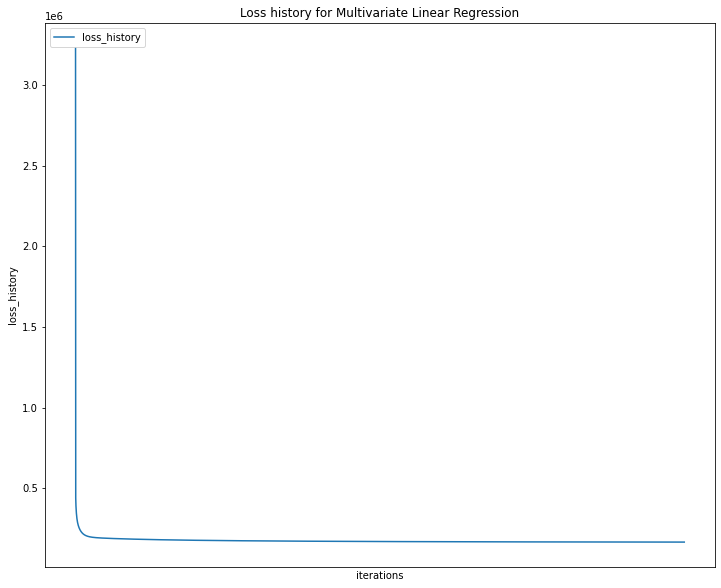

In [89]:
dataset = dataset_for_part_h
dataset.insert(0, "theta_0", np.ones(dataset.shape[0]))
feature_columns = dataset.drop('median_house_value', axis=1).columns

# print(">=========== split data to 60% train,20% validation and 20% test ===========<")
x_train, y_train, x_validation_test, y_validation_test = train_test_split(copy_df(dataset), train_size=.6, shuffle=True)
x_validation, y_validation, x_test, y_test = train_test_split(concat_data(x_validation_test, y_validation_test), test_size=.5, shuffle=True)

# convert all data to np array
x_train, y_train, x_validation, y_validation, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_validation), np.array(y_validation), np.array(x_test), np.array(y_test)

# add a column with all values 1 to the first column of x_train
# x_train = np.insert(x_train, 0, 1, axis=1) 
# print(">===========================================================================<")

# initialize theta with random values between 0 and 1
theta = np.random.rand(x_train.shape[1])
print("Intial theta shape: ", theta.shape[0], "\n", "Intial theta: ", theta)
print_hypothesis(x_train, theta)
y_train = y_train.reshape(y_train.shape[0],)
y_test = y_test.reshape(y_test.shape[0],)
y_validation = y_validation.reshape(y_validation.shape[0],)

theta, history_theta, loss_histoy = gradient_descent(x_train, y_train, x_validation, y_validation, theta, 0.5, .7, 10000)

y_predict = hypothesis(x_test, theta)
y_test = np.array(y_test).reshape(y_test.shape[0],)

report_error = pd.DataFrame({"mse": [calculate_mse(y_predict, y_test)], "rmse": [calculate_rmse(y_predict, y_test)], "mae": [
                            calculate_mae(y_predict, y_test)], "mape": [calculate_mape(y_predict, y_test)], "r_squared": [calculate_r_squared(y_predict, y_test)]})
print("Error on test set: \n", report_error)

coeffs = pd.DataFrame({"theta": history_theta[-1], "coeff": history_theta[-1]})
coeffs["coeff"] = coeffs["coeff"].apply(lambda x: np.round(x, 2))

# print(">===================== Figures =====================<")
# default plot
plt.figure(figsize=(11, 9))
plt.plot(range(len(coeffs)), coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_columns)), feature_columns, rotation=50)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title("Coefficients for Multivariate Linear Regression")
plt.legend(["coefficients"], loc="upper left")
plt.show()

plt.figure(figsize=(12, 10))
plt.scatter(y_test, y_predict)
plt.plot([y_test.min(), y_test.max()], [
         y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs True Values', fontsize=20)
plt.show()

plt.figure(figsize=(12, 10))
plt.plot(range(len(loss_histoy)), loss_histoy)
# plt.axhline(0, color='r', linestyle='solid')
plt.xticks([])
# plt.xticks(range(len(loss_histoy)), range(len(loss_histoy)), rotation=50)
plt.xlabel("iterations")
plt.ylabel("loss_history")
plt.title("Loss history for Multivariate Linear Regression")
plt.legend(["loss_history"], loc="upper left")
plt.show()
# print(">===================================================<")

### =================================================================================================

In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats
from sklearn.datasets import make_regression
from JSAnimation import IPython_display

# Explanatory Data Analysis (EDA)

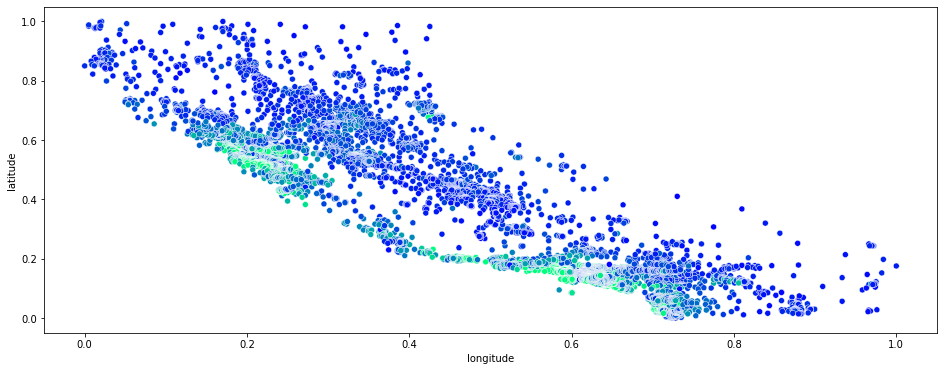

In [53]:
df = copy_df(dataset)

# Housing distribution on the map
plt.figure(figsize=(16,6))
fig = sns.scatterplot(df.longitude, df.latitude, hue=df['median_house_value'],
                      legend=False, palette='winter')

In [54]:
# Correlation matrix
df.corr().style.background_gradient()

<AxesSubplot:title={'center':'Correlation Matrix'}, xlabel='Features'>

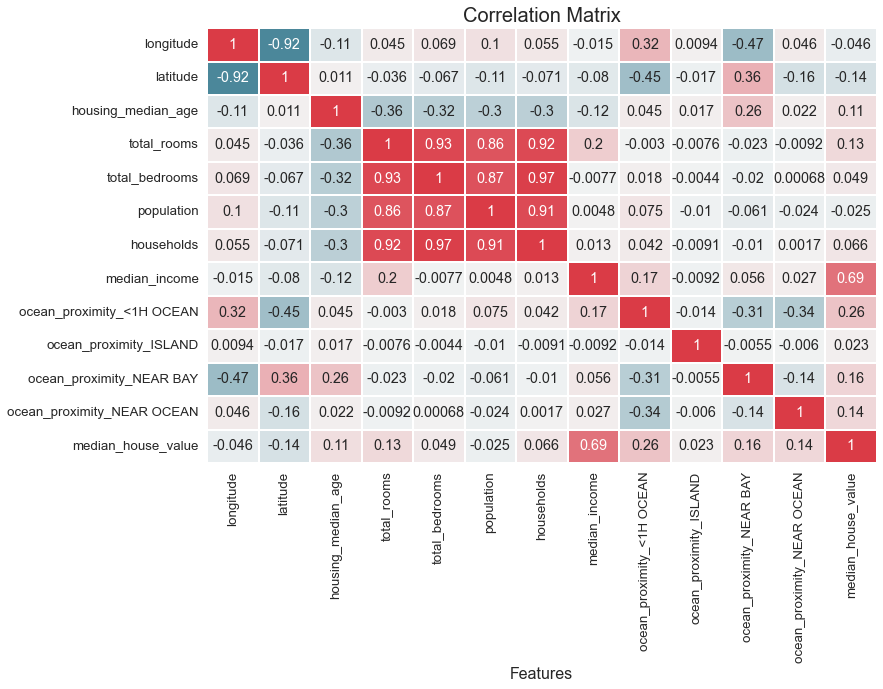

In [55]:
def correlation_heatmap(data):
    """arguments: data_frame:pandas DataFrame
       returns: correlation heatmap"""
    
    #  setting the context
    sns.set(context='paper', style='white', palette='deep', font='sans-serif', font_scale=1.5, color_codes=True)
    
    #  making correlation object and saving it into variable
    correlation = data.corr()
    
    #  creating heatmap figure object (paper) and ax object (the plot)
    fig, ax = plt.subplots(figsize=(12, 8))
    
    #  generating color palettes
    cmap = sns.diverging_palette(220, 10, center='light', as_cmap=True)
    
    #  draw the heatmap
    heatmap = sns.heatmap(correlation, vmax=1,vmin=-1,center=0, square=False, annot=True, cmap=cmap,
                         lw=2, cbar=False)
    
    # using fig and ax variables to set the title and labels
    heatmap.set_title('Correlation Matrix', fontsize=20)
    heatmap.set_xlabel('Features', fontsize=16)
    
    return heatmap

correlation_heatmap(df)

In [17]:
import os
import math
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

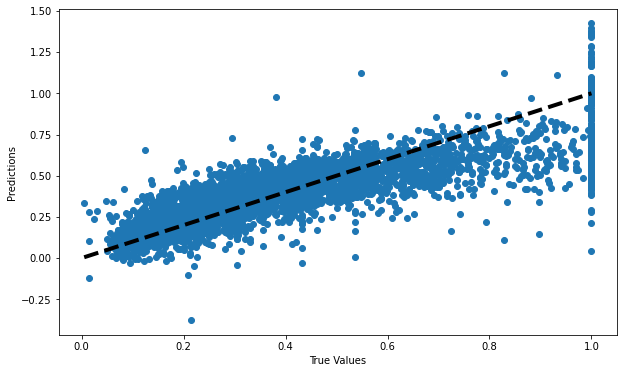

-0.020042918814001977
LinearRegression()
[0.41595067]
[ 0.         -0.55932788 -0.49483336  0.11158626 -0.52094432  1.467754
 -2.78026024  0.50599421  1.17703152  0.0824092   0.39362237  0.07121773
  0.08905665]


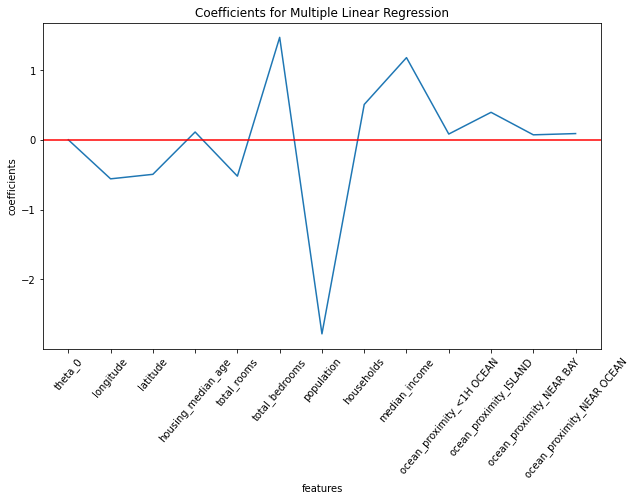

mse: [-0.01961234 -0.01803465 -0.0197771  -0.02040801 -0.0186587  -0.01766905
 -0.02024587 -0.02131435 -0.02386816 -0.02084096]


In [42]:
dataset = load("housing.csv")
dataset = normalize_missing_values(dataset)
last_column = dataset[["median_house_value"]]
dataset = remove_column(dataset, "median_house_value")

dataset = dummy_variable_indicator(dataset, "ocean_proximity")
dataset = remove_column(dataset, "ocean_proximity_INLAND")
dataset = concat_data(dataset, last_column)

dataset = normalize_numerical_columns(dataset)

dataset.insert(0, "theta_0", np.ones(dataset.shape[0]))

X = dataset.drop('median_house_value', axis=1)
y = dataset[['median_house_value']]

feature_columns = list(X.columns)

x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(X, y, test_size=.4, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

regressor = LinearRegression(fit_intercept=True)
model = regressor.fit(x_train, y_train)
y_predict = model.predict(x_test)

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_predict)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

mse = cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
print(mse.mean())

multiple_lr_coeffs = model.coef_[0]
print(model.intercept_)
print(multiple_lr_coeffs)

plt.figure(figsize=(10,6))
plt.plot(range(len(multiple_lr_coeffs)),multiple_lr_coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_columns)),feature_columns,rotation=50)
plt.title("Coefficients for Multiple Linear Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

print("mse:", mse)

In [28]:
x_train.corr().style.background_gradient(cmap='coolwarm')

In [44]:
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.07, 0.075, 0.08, 0.09,0.1,0.2,0.3,0.31,0.32,0.33,0.34, 0.35, 0.351, 0.352, 0.0353, 0.0354, 0.355 , 0.356 ,0.357, 0.358, 0.359 ,0.36, 0.37,0.38, 0.39, 0.4, 0.45, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
ridge= GridSearchCV(Ridge(), alpha_values, scoring='neg_mean_squared_error', cv=10 )
ridge.fit(x_train, y_train)
print(ridge.best_params_)

{'alpha': 0.3}


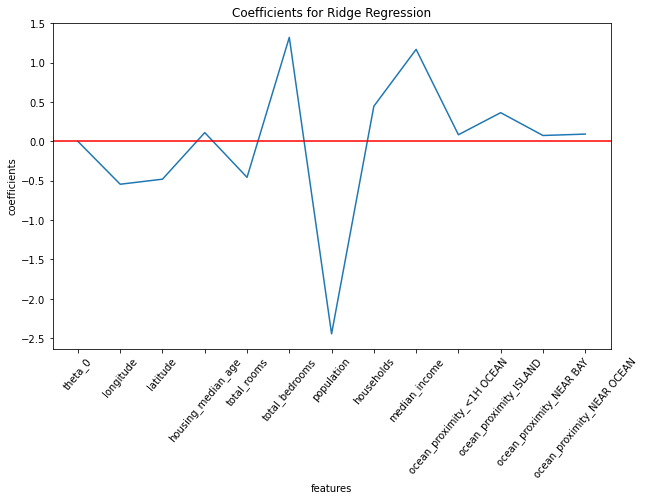

In [45]:
best_ridge_model= Ridge(alpha=ridge.best_params_['alpha'])
best_ridge_coeffs = best_ridge_model.fit(x_train, y_train).coef_
# print(best_ridge_coeffs)
#plot 
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_columns)),best_ridge_coeffs[0])
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_columns)),feature_columns,rotation=50)
plt.title("Coefficients for Ridge Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [46]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06,0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
lasso = GridSearchCV(Lasso(), alpha_values, scoring='neg_mean_squared_error', cv=10 )
lasso_fit = lasso.fit(x_train, y_train)
print(lasso_fit.best_params_)
print(lasso_fit.best_score_)

{'alpha': 0.001}
-0.02262223714466208


[ 0.         -0.01894358 -0.          0.08820824  0.          0.08105182
 -0.          0.          1.08835328  0.14311988  0.          0.15631366
  0.16910718]


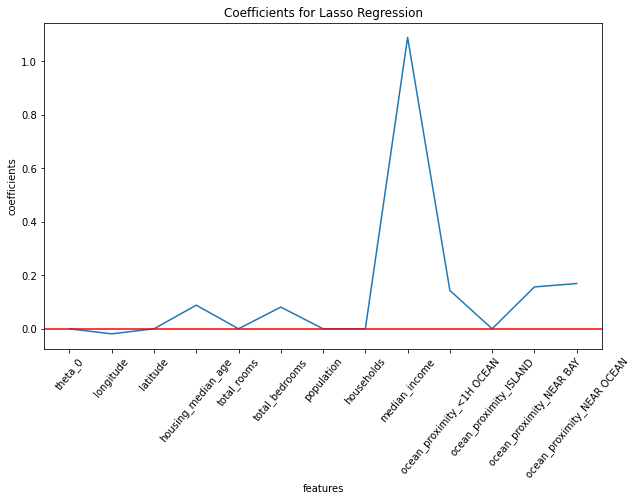

In [47]:
best_lasso_model= Lasso(alpha=lasso_fit.best_params_['alpha'])
best_lasso_coeffs = best_lasso_model.fit(x_train, y_train).coef_

print(best_lasso_coeffs)

# plot
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_columns)),best_lasso_coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_columns)),feature_columns,rotation=50)
plt.title("Coefficients for Lasso Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()


In [50]:
alpha_values = {'alpha':[0.01, 0.05, 0.06, 0.08, 1], 'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]}
elastic = GridSearchCV(ElasticNet(), alpha_values, scoring='neg_mean_squared_error', cv=10 )
elastic_fit = elastic.fit(x_train, y_train)
print(elastic_fit.best_params_)
print(elastic_fit.best_score_)

{'alpha': 0.01, 'l1_ratio': 0.1}
-0.025939313186586637


In [51]:
best_elastic_coeefs = elastic_fit.best_estimator_.coef_


In [52]:
# compare models with different regularization parameters
comparing_models = [('Linear Regression', LinearRegression()), ('Ridge Regression', Ridge()), ('Lasso Regression', Lasso()), ('Elastic Net', ElasticNet())]

comparing_models = pd.DataFrame({'without_regularization':multiple_lr_coeffs,
 'Ridge':best_ridge_coeffs[0],
 'Lasso':best_lasso_coeffs,
  'Elastic Net':best_elastic_coeefs}, index=feature_columns)
# Highlighting coefficient estimates with value '0'
comparing_models.style.background_gradient(cmap='coolwarm')

comparing_models

without_regularization     Ridge     Lasso  \
theta_0                                   0.000000  0.000000  0.000000   
longitude                                -0.559328 -0.544001 -0.018944   
latitude                                 -0.494833 -0.479799 -0.000000   
housing_median_age                        0.111586  0.111736  0.088208   
total_rooms                              -0.520944 -0.456392  0.000000   
total_bedrooms                            1.467754  1.322090  0.081052   
population                               -2.780260 -2.444812 -0.000000   
households                                0.505994  0.447080  0.000000   
median_income                             1.177032  1.169511  1.088353   
ocean_proximity_<1H OCEAN                 0.082409  0.084638  0.143120   
ocean_proximity_ISLAND                    0.393622  0.365103  0.000000   
ocean_proximity_NEAR BAY                  0.071218  0.075298  0.156314   
ocean_proximity_NEAR OCEAN                0.089057  0.092860  0.169107   

                            Elastic Net  
theta_0                        0.000000  
longitude                     -0.046550  
latitude                      -0.022790  
housing_median_age             0.046589  
total_rooms                    0.010282  
total_bedrooms                 0.003804  
population                    -0.000000  
households                     0.000000  
median_income                  0.697426  
ocean_proximity_<1H OCEAN      0.155535  
ocean_proximity_ISLAND         0.000000  
ocean_proximity_NEAR BAY       0.161656  
ocean_proximity_NEAR OCEAN     0.165327

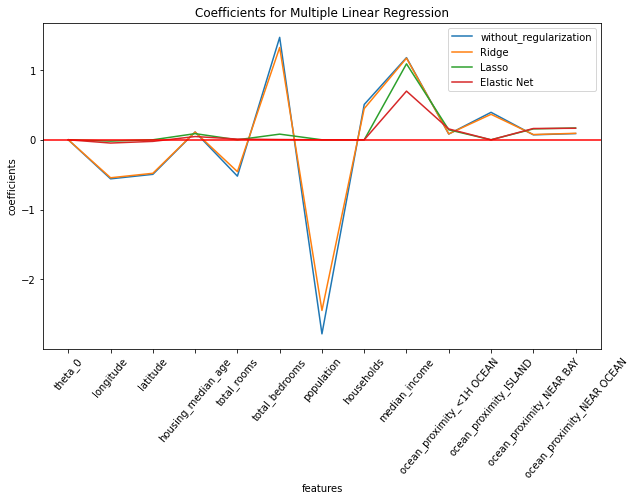

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_columns)),comparing_models['without_regularization'], label='without_regularization')
plt.plot(range(len(feature_columns)),comparing_models['Ridge'], label='Ridge')
plt.plot(range(len(feature_columns)),comparing_models['Lasso'], label='Lasso')
plt.plot(range(len(feature_columns)),comparing_models['Elastic Net'], label='Elastic Net')
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_columns)),feature_columns,rotation=50)
plt.title("Coefficients for Multiple Linear Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.legend()
plt.show()

In [54]:
# solve same problem with neural network
from sklearn.neural_network import MLPRegressor
dataset = load("housing.csv")
dataset = normalize_missing_values(dataset)
last_column = dataset[["median_house_value"]]
dataset = remove_column(dataset, "median_house_value")
dataset = dummy_variable_indicator(dataset, "ocean_proximity")
dataset = remove_column(dataset, "ocean_proximity_INLAND")
dataset = concat_data(dataset, last_column)

# dataset = normalize_numerical_columns(dataset)

X = dataset.drop('median_house_value', axis=1)
y = dataset[['median_house_value']]

feature_columns = list(X.columns)

# split dataset into train, validation and test - 80% train, 10% validation and 10% test with sklearn

SEED = 42
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(
    X, y, test_size=.4, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(
    x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True,
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# fit the model with regularization
mlp.fit(x_train, y_train)
mlp.score(x_train, y_train)
mlp.score(x_validation, y_validation)
mlp.score(x_test, y_test)

print(mlp.coefs_)
print(mlp.intercepts_)

# predict the test set
y_pred = mlp.predict(x_test)


# MSE, MAE, R2
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print("R2: %.2f" % r2_score(y_test, y_pred))


[array([[-5.11102128e+000, -1.71822580e-254,  5.86142466e+000, ...,
        -5.39055068e+000, -5.01227186e+000, -5.22631462e+000],
       [ 4.05562547e+000, -3.49130830e-273, -4.49842810e+000, ...,
         3.93978498e+000,  4.35000674e+000,  4.23356753e+000],
       [ 6.42211023e+000, -4.52870805e-271, -7.39314647e+000, ...,
         6.68503340e+000,  6.47193697e+000,  6.53935933e+000],
       ...,
       [ 2.46704285e+000, -3.21640961e-261, -3.01627989e+000, ...,
         2.83813121e+000,  2.48706103e+000,  2.69973345e+000],
       [ 1.02965408e+001, -9.58854489e-255, -1.07375632e+001, ...,
         1.02996773e+001,  1.03020071e+001,  1.03424014e+001],
       [ 1.12568901e+001,  1.39841264e-253, -1.21066046e+001, ...,
         1.14618329e+001,  1.15424476e+001,  1.15510239e+001]]), array([[ 2.62653788e+000],
       [ 1.39076287e-278],
       [-3.48625538e+000],
       [ 2.41821780e+000],
       [ 2.47798243e+000],
       [ 1.98815050e+000],
       [ 2.11189142e+000],
       [ 5.55409

# Q2: Logistic Regression

In [67]:
# print(">======================= Loading ====================<")
dataset = load("data_banknote_authentication.txt", False)
# print(">=====================================================")

# print(">============ Data without missing values ===========<")
dataset = normalize_missing_values(dataset)
# last_column = dataset[["median_house_value"]]
# dataset = remove_column(dataset, "median_house_value")
dataset.rename(columns={0: 'column_1', 1: 'column_2', 2: 'column_3', 3: 'column_4', 4:'label' }, inplace=True)
print_dataset(dataset)
# dataset.tail()

# print(">=====================================================")

# print(">===== One-hot encoder for categorical data =========<")
# dataset = dummy_variable_indicator(dataset, "ocean_proximity")
# dataset = remove_column(dataset, "ocean_proximity_INLAND")
# dataset = concat_data(dataset, last_column)
# print(">=====================================================")

# for part H of the assignment
# dataset_for_part_h = copy_df(dataset)
# print(">================== Normalized data =================<")
# dataset = normalize_numerical_columns(dataset)
# print_dataset(dataset)
# print(dataset.head())
# print(">=====================================================")

# print(">=========== split data to 60% train,20% validation and 20% test ===========<")
x_train, y_train, x_validation_test, y_validation_test = train_test_split(copy_df(dataset), train_size=.6, shuffle=True)
x_validation, y_validation, x_test, y_test = train_test_split(concat_data(x_validation_test, y_validation_test), test_size=.5, shuffle=True)

# convert all data to np array
# x_train, y_train, x_validation, y_validation, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_validation), np.array(y_validation), np.array(x_test), np.array(y_test)

   column_1  column_2  column_3  column_4  label
0   3.62160    8.6661   -2.8073  -0.44699      0
1   4.54590    8.1674   -2.4586  -1.46210      0
2   3.86600   -2.6383    1.9242   0.10645      0
3   3.45660    9.5228   -4.0112  -3.59440      0
4   0.32924   -4.4552    4.5718  -0.98880      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   column_1  1372 non-null   float64
 1   column_2  1372 non-null   float64
 2   column_3  1372 non-null   float64
 3   column_4  1372 non-null   float64
 4   label     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None
          column_1     column_2     column_3     column_4        label
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013 

In [57]:
# X = dataset[['column_1', 'column_2', 'column_3', 'column_4']].values
# y = dataset['label'].values.reshape(-1, 1)


In [68]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

classes:  [0 1] coef:  [[-3.06415839 -1.75008125 -2.1082241  -0.15533781]] intercept:  [3.21217099]
1.0


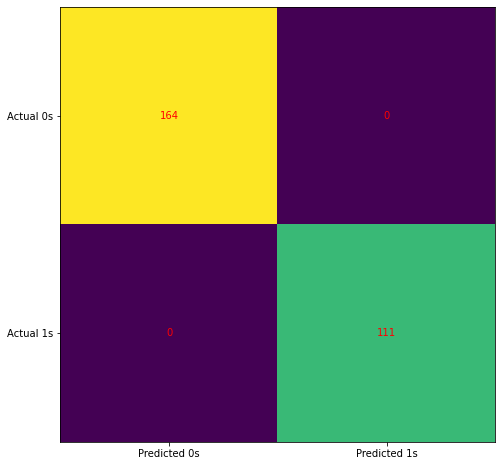

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       111

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [74]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X, y)
print("classes: ",model.classes_, "coef: ", model.coef_, "intercept: ", model.intercept_)
model.predict_proba(x_test)
y_predict = model.predict(x_test)
print(model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(y_test, model.predict(x_test)))


In [34]:
# logistic regression untility function
def logistic(z):
    return 1 / (1 + np.exp(-z))

M, N = X.shape
X = np.concatenate((np.ones((M, 1)), X), axis=1)
print(X)

[[  1.        3.6216    8.6661   -2.8073   -0.44699]
 [  1.        4.5459    8.1674   -2.4586   -1.4621 ]
 [  1.        3.866    -2.6383    1.9242    0.10645]
 ...
 [  1.       -3.7503  -13.4586   17.5932   -2.7771 ]
 [  1.       -3.5637   -8.3827   12.393    -1.2823 ]
 [  1.       -2.5419   -0.65804   2.6842    1.1952 ]]


In [35]:
alpha = 0.5
epsilon = 0.12

weights = 2*np.random.rand(N+1, 1)*epsilon - epsilon

oldJ = 0
err = 1

Js = []
count = 0

while err > 1e-3:
    Zs = np.dot(X, weights)
    Hs = logistic(Zs) # phi
    
    deltas = alpha/M*np.dot(X.T, (Hs-y))
    weights -= deltas

    count += 1

    # Cross Entropy
    J = -1/M*(np.dot(y.T, np.log(Hs)) + np.dot(1-y.T, np.log(1-Hs)))
    
    Js.append(float(J))
    err = np.abs(oldJ-J)
    oldJ = J
    
    if count % 10 == 0:
        print(count, J, err, weights.flatten())

print(count, J, err, weights.flatten())

10 [[0.12547923]] [[0.00454762]] [ 0.34990808 -1.07691658 -0.53655805 -0.54498501 -0.23275809]
20 [[0.09725384]] [[0.00199153]] [ 0.59085059 -1.25321745 -0.6668041  -0.6996085  -0.26557674]
30 [[0.0822278]] [[0.00120257]] [ 0.7861224  -1.37270143 -0.7548469  -0.80807973 -0.27413342]
35 [[0.07689934]] [[0.00098395]] [ 0.87154032 -1.42137343 -0.79050236 -0.85264076 -0.27451604]


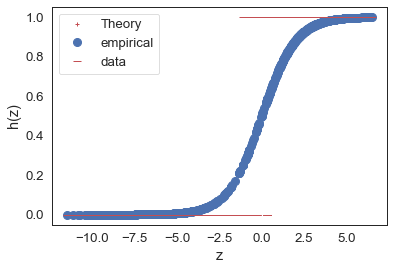

In [43]:
def plot_boundary(Zs, Hs, y):
    data_fit = np.concatenate((Zs, Hs), axis=1)
    data_fit.sort(axis = 0)

    z = np.linspace(Zs.min(), Zs.max(), 100)

    plt.plot(z, logistic(z), 'r+', label='Theory')
    plt.plot(Zs, Hs, 'o', label='empirical', markersize=8)
    plt.plot(Zs, y, 'r_', label = 'data', markersize=8)
    plt.xlabel('z')
    plt.ylabel('h(z)')
    #plt.title('Logistic Regression')
    plt.legend()

plot_boundary(Zs, Hs, y)


ValueError: shapes (5,1) and (3,) not aligned: 1 (dim 1) != 3 (dim 0)

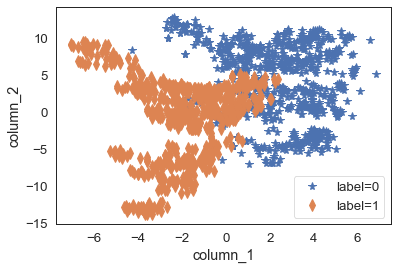

In [37]:
def plot_points(data, features, weights, label='label'):
    plt.plot(data[features[0]][data[label]==0], 
             data[features[1]][data[label]==0], '*', label='label=0', markersize=8)
    
    plt.plot(data[features[0]][data[label]==1], 
             data[features[1]][data[label]==1], 'd', label='label=1', markersize=8)

    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend()

plot_points(dataset, ['column_1', 'column_2'], weights)


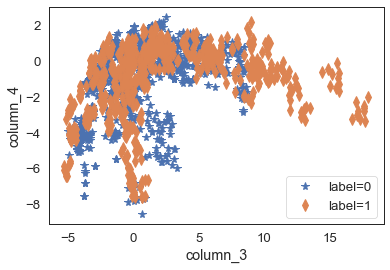

In [38]:
plot_points(dataset, ['column_3', 'column_4'], weights)
